### 9.9 Notes
### Description
- Created Keras model (non RNN)
- Added dropouts between layers
- Attempted Grid Search to optimize layer size and dropout size

## Import all Libraries

In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gather Training and Testing Data

In [15]:
# Read in dataframe
df = pd.read_csv('fbdh1.csv')

In [175]:
# df.head()

In [16]:
# Use a label fix function to assign classifications or ground truth to Flow thresholds
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [17]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,0
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0


## EDA

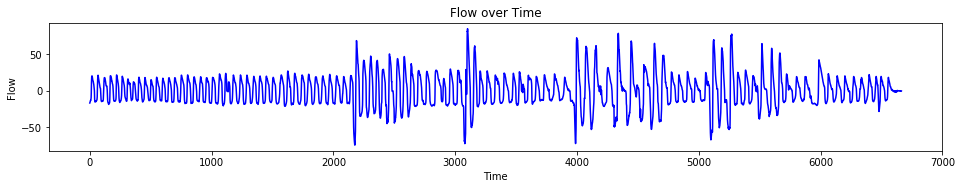

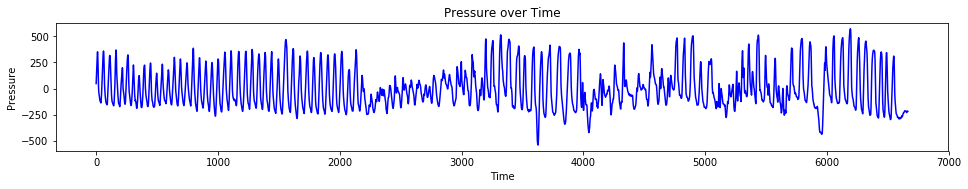

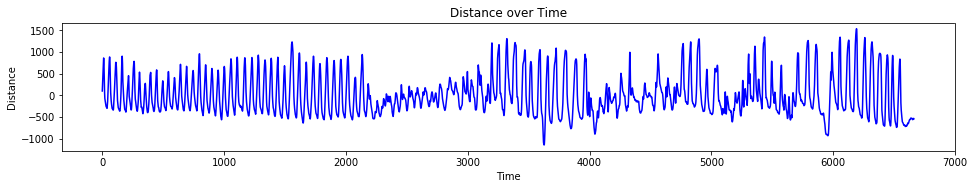

In [18]:
time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

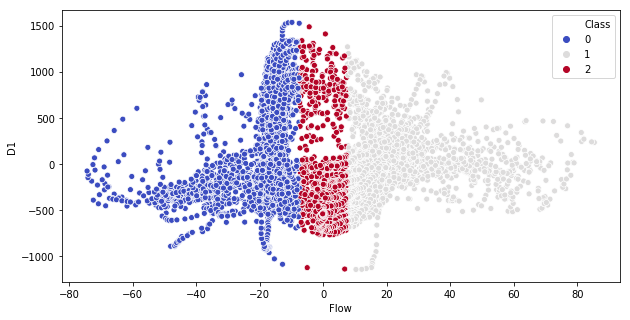

In [19]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x = flow, y = distance, hue = df['Class'], palette = 'coolwarm')

## Scale and Create Feature Matrix

In [20]:
# Create the Feature Matrix and Scale Features
X = df.drop('Flow', axis = 1)
X.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

## Develop Keras Model w/ Dropout

In [21]:
X_train.head()

,D1,D2,P1,P2,dD1,dD2,dP1,dP2
6382,2.100301,-0.003784,1.926052,0.181271,0.237649,0.584556,0.194515,0.971448
3341,0.338851,0.196303,0.448789,0.855010,-0.998258,-1.153910,-1.019022,-1.261406
625,-0.409912,-0.214330,-0.429987,-0.327666,0.626804,0.024127,0.745872,0.142925
4160,0.317960,-0.344304,0.388391,0.128412,1.901608,-2.169717,2.045861,-1.816420
4591,0.157642,-0.850545,0.242941,-0.661145,-0.340940,-0.476176,-0.380294,-0.696794


In [23]:
y_train.head()

6382    0
3341    1
625     0
4160    1
4591    2
Name: Class, dtype: int64

In [88]:
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 150)               1350      
_________________________________________________________________
dropout_18 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 50)                7550      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [89]:
EPOCHS = 40

model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/40
4664/4664 [==============================] - 0s 52us/sample - loss: 0.5745 - acc: 0.7729
Epoch 2/40
4664/4664 [==============================] - 0s 28us/sample - loss: 0.3808 - acc: 0.8561
Epoch 3/40
4664/4664 [==============================] - 0s 28us/sample - loss: 0.3459 - acc: 0.8662
Epoch 4/40
4664/4664 [==============================] - 0s 29us/sample - loss: 0.3328 - acc: 0.8707
Epoch 5/40
4664/4664 [==============================] - 0s 28us/sample - loss: 0.3161 - acc: 0.8786
Epoch 6/40
4664/4664 [==============================] - 0s 29us/sample - loss: 0.3067 - acc: 0.8821
Epoch 7/40
4664/4664 [==============================] - 0s 27us/sample - loss: 0.3042 - acc: 0.8889
Epoch 8/40
4664/4664 [==============================] - 0s 26us/sample - loss: 0.3005 - acc: 0.8887
Epoch 9/40
4664/4664 [==============================] - 0s 28us/sample - loss: 0.3033 - acc: 0.8838
Epoch 10/40
4664/4664 [==============================] - 0s 27us/sample - loss: 0.2927 - acc: 0.8859

In [90]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 56us/sample - loss: 0.2686 - acc: 0.8975
Test accuracy: 0.8975
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       817
           1       0.94      0.91      0.92       814
           2       0.73      0.79      0.76       369

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.87      0.88      0.87      2000
weighted avg       0.90      0.90      0.90      2000



## Test on New Dataset

In [91]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

# Create the Feature Matrix and Scale Features
X_1 = test.drop('Flow', axis = 1)
X_1.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 14us/sample - loss: 0.5617 - acc: 0.8559
Test accuracy: 0.8559474
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2145
           1       0.88      0.88      0.88      2074
           2       0.72      0.69      0.71       800

   micro avg       0.86      0.86      0.86      5019
   macro avg       0.83      0.82      0.83      5019
weighted avg       0.85      0.86      0.86      5019



## Gridsearch to Optimize Parameters (Attempt)

In [92]:
from sklearn.model_selection import GridSearchCV

In [119]:
def build_classifier(Dense_1, Dense_2, Dropout_1, Dropout_2):
    classifier = keras.Sequential()
    classifier.add(keras.layers.Dense(Dense_1, activation = tf.nn.relu, input_dim = 8))
    classifier.add(keras.layers.Dropout(Dropout_1))
    classifier.add(keras.layers.Dense(Dense_2, activation = tf.nn.relu))
    classifier.add(keras.layers.Dropout(Dropout_2))
    classifier.add(keras.layers.Dense(3, activation = tf.nn.softmax))
    classifier.compile(optimizer = 'adam', 
                       loss = 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    return classifier

In [120]:
classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_classifier)

In [124]:
parameters = {'Dense_1': [150, 250], 
             'Dense_2': [50, 75], 
             'Dropout_1': [0.3, 0.4],
             'Dropout_2': [0.3, 0.4], 
             'epochs': [50]}

In [125]:
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters, 
                          scoring = 'accuracy', 
                          cv = 10)

In [126]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
4197/4197 [==============================] - 2s 381us/sample - loss: 0.5560 - acc: 0.7879
Epoch 2/50
4197/4197 [==============================] - 1s 127us/sample - loss: 0.3494 - acc: 0.8659
Epoch 3/50
4197/4197 [==============================] - 1s 126us/sample - loss: 0.3197 - acc: 0.8761
Epoch 4/50
4197/4197 [==============================] - 1s 129us/sample - loss: 0.3073 - acc: 0.8809
Epoch 5/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.3056 - acc: 0.8799
Epoch 6/50
4197/4197 [==============================] - 1s 135us/sample - loss: 0.2893 - acc: 0.8840
Epoch 7/50
4197/4197 [==============================] - 1s 136us/sample - loss: 0.2877 - acc: 0.8878
Epoch 8/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2823 - acc: 0.8892
Epoch 9/50
4197/4197 [==============================] - 1s 136us/sample - loss: 0.2899 - acc: 0.8902
Epoch 10/50
4197/4197 [==============================] - 1s 129us/sample - loss: 0.2736 - a

4197/4197 [==============================] - 1s 134us/sample - loss: 0.2442 - acc: 0.8999
Epoch 32/50
4197/4197 [==============================] - 1s 132us/sample - loss: 0.2513 - acc: 0.9011
Epoch 33/50
4197/4197 [==============================] - 1s 133us/sample - loss: 0.2495 - acc: 0.8992
Epoch 34/50
4197/4197 [==============================] - 1s 127us/sample - loss: 0.2450 - acc: 0.9037
Epoch 35/50
4197/4197 [==============================] - 0s 111us/sample - loss: 0.2541 - acc: 0.8997
Epoch 36/50
4197/4197 [==============================] - 0s 118us/sample - loss: 0.2501 - acc: 0.9028
Epoch 37/50
4197/4197 [==============================] - 1s 133us/sample - loss: 0.2529 - acc: 0.9025
Epoch 38/50
4197/4197 [==============================] - 1s 136us/sample - loss: 0.2477 - acc: 0.8978
Epoch 39/50
4197/4197 [==============================] - 1s 132us/sample - loss: 0.2485 - acc: 0.9016
Epoch 40/50
4197/4197 [==============================] - 1s 124us/sample - loss: 0.2476 - acc:

4197/4197 [==============================] - 0s 109us/sample - loss: 0.2686 - acc: 0.8918
Epoch 12/50
4197/4197 [==============================] - 0s 110us/sample - loss: 0.2699 - acc: 0.8964
Epoch 13/50
4197/4197 [==============================] - 0s 106us/sample - loss: 0.2696 - acc: 0.8933
Epoch 14/50
4197/4197 [==============================] - 0s 110us/sample - loss: 0.2696 - acc: 0.8930
Epoch 15/50
4197/4197 [==============================] - 0s 110us/sample - loss: 0.2625 - acc: 0.8995
Epoch 16/50
4197/4197 [==============================] - 0s 108us/sample - loss: 0.2553 - acc: 0.9040
Epoch 17/50
4197/4197 [==============================] - 0s 107us/sample - loss: 0.2563 - acc: 0.9014
Epoch 18/50
4197/4197 [==============================] - 0s 109us/sample - loss: 0.2557 - acc: 0.9009
Epoch 19/50
4197/4197 [==============================] - 0s 108us/sample - loss: 0.2588 - acc: 0.8954
Epoch 20/50
4197/4197 [==============================] - 0s 113us/sample - loss: 0.2553 - acc:

4198/4198 [==============================] - 1s 120us/sample - loss: 0.2425 - acc: 0.9030
Epoch 42/50
4198/4198 [==============================] - 1s 120us/sample - loss: 0.2379 - acc: 0.9052
Epoch 43/50
4198/4198 [==============================] - 1s 128us/sample - loss: 0.2325 - acc: 0.9083
Epoch 44/50
4198/4198 [==============================] - 1s 128us/sample - loss: 0.2408 - acc: 0.9052
Epoch 45/50
4198/4198 [==============================] - 1s 124us/sample - loss: 0.2409 - acc: 0.9095
Epoch 46/50
4198/4198 [==============================] - 1s 123us/sample - loss: 0.2392 - acc: 0.9045
Epoch 47/50
4198/4198 [==============================] - 1s 125us/sample - loss: 0.2370 - acc: 0.9038
Epoch 48/50
4198/4198 [==============================] - 1s 125us/sample - loss: 0.2382 - acc: 0.9023
Epoch 49/50
4198/4198 [==============================] - 1s 129us/sample - loss: 0.2345 - acc: 0.9057
Epoch 50/50
4198/4198 [==============================] - 1s 130us/sample - loss: 0.2368 - acc:

4198/4198 [==============================] - 1s 132us/sample - loss: 0.2509 - acc: 0.9021
Epoch 22/50
4198/4198 [==============================] - 1s 136us/sample - loss: 0.2453 - acc: 0.9040
Epoch 23/50
4198/4198 [==============================] - 1s 143us/sample - loss: 0.2552 - acc: 0.9028
Epoch 24/50
4198/4198 [==============================] - 1s 128us/sample - loss: 0.2533 - acc: 0.8969
Epoch 25/50
4198/4198 [==============================] - 1s 149us/sample - loss: 0.2514 - acc: 0.9035
Epoch 26/50
4198/4198 [==============================] - 1s 145us/sample - loss: 0.2431 - acc: 0.9033
Epoch 27/50
4198/4198 [==============================] - 1s 146us/sample - loss: 0.2469 - acc: 0.9054
Epoch 28/50
4198/4198 [==============================] - 1s 145us/sample - loss: 0.2487 - acc: 0.9021
Epoch 29/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2488 - acc: 0.9038
Epoch 30/50
4198/4198 [==============================] - 1s 144us/sample - loss: 0.2457 - acc:

4198/4198 [==============================] - 2s 403us/sample - loss: 0.5428 - acc: 0.7947
Epoch 2/50
4198/4198 [==============================] - 1s 138us/sample - loss: 0.3477 - acc: 0.8668
Epoch 3/50
4198/4198 [==============================] - 1s 131us/sample - loss: 0.3288 - acc: 0.8718
Epoch 4/50
4198/4198 [==============================] - 1s 132us/sample - loss: 0.3133 - acc: 0.8776
Epoch 5/50
4198/4198 [==============================] - 1s 136us/sample - loss: 0.3050 - acc: 0.8840
Epoch 6/50
4198/4198 [==============================] - 1s 131us/sample - loss: 0.2950 - acc: 0.8892
Epoch 7/50
4198/4198 [==============================] - 1s 136us/sample - loss: 0.2957 - acc: 0.8871
Epoch 8/50
4198/4198 [==============================] - 1s 128us/sample - loss: 0.2868 - acc: 0.8907
Epoch 9/50
4198/4198 [==============================] - 1s 142us/sample - loss: 0.2859 - acc: 0.8916
Epoch 10/50
4198/4198 [==============================] - 1s 136us/sample - loss: 0.2734 - acc: 0.8940


4198/4198 [==============================] - 1s 131us/sample - loss: 0.2523 - acc: 0.9028
Epoch 32/50
4198/4198 [==============================] - 1s 142us/sample - loss: 0.2503 - acc: 0.8964
Epoch 33/50
4198/4198 [==============================] - 1s 138us/sample - loss: 0.2550 - acc: 0.9000
Epoch 34/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2531 - acc: 0.8997
Epoch 35/50
4198/4198 [==============================] - 1s 131us/sample - loss: 0.2505 - acc: 0.9028
Epoch 36/50
4198/4198 [==============================] - 1s 131us/sample - loss: 0.2480 - acc: 0.9028
Epoch 37/50
4198/4198 [==============================] - 1s 134us/sample - loss: 0.2476 - acc: 0.9016
Epoch 38/50
4198/4198 [==============================] - 1s 134us/sample - loss: 0.2432 - acc: 0.9030
Epoch 39/50
4198/4198 [==============================] - 1s 129us/sample - loss: 0.2446 - acc: 0.9021
Epoch 40/50
4198/4198 [==============================] - 1s 134us/sample - loss: 0.2492 - acc:

4197/4197 [==============================] - 1s 129us/sample - loss: 0.2864 - acc: 0.8899
Epoch 12/50
4197/4197 [==============================] - 1s 136us/sample - loss: 0.2894 - acc: 0.8914
Epoch 13/50
4197/4197 [==============================] - 1s 132us/sample - loss: 0.2861 - acc: 0.8890
Epoch 14/50
4197/4197 [==============================] - 1s 131us/sample - loss: 0.2832 - acc: 0.8909
Epoch 15/50
4197/4197 [==============================] - 1s 133us/sample - loss: 0.2822 - acc: 0.8868
Epoch 16/50
4197/4197 [==============================] - 1s 134us/sample - loss: 0.2708 - acc: 0.8947
Epoch 17/50
4197/4197 [==============================] - 1s 133us/sample - loss: 0.2743 - acc: 0.8930
Epoch 18/50
4197/4197 [==============================] - 1s 133us/sample - loss: 0.2683 - acc: 0.8959
Epoch 19/50
4197/4197 [==============================] - 1s 130us/sample - loss: 0.2699 - acc: 0.8975
Epoch 20/50
4197/4197 [==============================] - 1s 128us/sample - loss: 0.2666 - acc:

4197/4197 [==============================] - 1s 120us/sample - loss: 0.2444 - acc: 0.8987
Epoch 42/50
4197/4197 [==============================] - 0s 118us/sample - loss: 0.2507 - acc: 0.9009
Epoch 43/50
4197/4197 [==============================] - 0s 117us/sample - loss: 0.2423 - acc: 0.9033
Epoch 44/50
4197/4197 [==============================] - 0s 115us/sample - loss: 0.2430 - acc: 0.9037
Epoch 45/50
4197/4197 [==============================] - 0s 118us/sample - loss: 0.2468 - acc: 0.9023
Epoch 46/50
4197/4197 [==============================] - 0s 112us/sample - loss: 0.2422 - acc: 0.9040
Epoch 47/50
4197/4197 [==============================] - 0s 115us/sample - loss: 0.2390 - acc: 0.9045
Epoch 48/50
4197/4197 [==============================] - 0s 111us/sample - loss: 0.2403 - acc: 0.9045
Epoch 49/50
4197/4197 [==============================] - 0s 117us/sample - loss: 0.2379 - acc: 0.9018
Epoch 50/50
4197/4197 [==============================] - 0s 114us/sample - loss: 0.2490 - acc:

4198/4198 [==============================] - 1s 123us/sample - loss: 0.2661 - acc: 0.8945
Epoch 22/50
4198/4198 [==============================] - 0s 118us/sample - loss: 0.2568 - acc: 0.8980
Epoch 23/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2582 - acc: 0.9014
Epoch 24/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.2522 - acc: 0.9009
Epoch 25/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2556 - acc: 0.9019
Epoch 26/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2574 - acc: 0.9009
Epoch 27/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2563 - acc: 0.9007
Epoch 28/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.2501 - acc: 0.9061
Epoch 29/50
4198/4198 [==============================] - 0s 113us/sample - loss: 0.2544 - acc: 0.9045
Epoch 30/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.2528 - acc:

4198/4198 [==============================] - 2s 397us/sample - loss: 0.5552 - acc: 0.7889
Epoch 2/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.3510 - acc: 0.8683
Epoch 3/50
4198/4198 [==============================] - 0s 118us/sample - loss: 0.3202 - acc: 0.8771
Epoch 4/50
4198/4198 [==============================] - 0s 115us/sample - loss: 0.3109 - acc: 0.8828
Epoch 5/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2869 - acc: 0.8935
Epoch 6/50
4198/4198 [==============================] - 0s 115us/sample - loss: 0.2921 - acc: 0.8845
Epoch 7/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2926 - acc: 0.8880
Epoch 8/50
4198/4198 [==============================] - 0s 114us/sample - loss: 0.2787 - acc: 0.8909
Epoch 9/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2762 - acc: 0.8916
Epoch 10/50
4198/4198 [==============================] - 0s 113us/sample - loss: 0.2733 - acc: 0.8964


4198/4198 [==============================] - 1s 136us/sample - loss: 0.2627 - acc: 0.8971
Epoch 32/50
4198/4198 [==============================] - 1s 124us/sample - loss: 0.2558 - acc: 0.9026
Epoch 33/50
4198/4198 [==============================] - 1s 122us/sample - loss: 0.2635 - acc: 0.8964
Epoch 34/50
4198/4198 [==============================] - 0s 118us/sample - loss: 0.2627 - acc: 0.8971
Epoch 35/50
4198/4198 [==============================] - 1s 123us/sample - loss: 0.2568 - acc: 0.9000
Epoch 36/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2632 - acc: 0.8995
Epoch 37/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2560 - acc: 0.9000
Epoch 38/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2528 - acc: 0.9026
Epoch 39/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2605 - acc: 0.8978
Epoch 40/50
4198/4198 [==============================] - 1s 121us/sample - loss: 0.2586 - acc:

4198/4198 [==============================] - 1s 120us/sample - loss: 0.2857 - acc: 0.8928
Epoch 12/50
4198/4198 [==============================] - 1s 123us/sample - loss: 0.2769 - acc: 0.8961
Epoch 13/50
4198/4198 [==============================] - 0s 119us/sample - loss: 0.2780 - acc: 0.8938
Epoch 14/50
4198/4198 [==============================] - 0s 116us/sample - loss: 0.2769 - acc: 0.8911
Epoch 15/50
4198/4198 [==============================] - 1s 120us/sample - loss: 0.2786 - acc: 0.8942
Epoch 16/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.2738 - acc: 0.8947
Epoch 17/50
4198/4198 [==============================] - 0s 118us/sample - loss: 0.2768 - acc: 0.8959
Epoch 18/50
4198/4198 [==============================] - 1s 122us/sample - loss: 0.2675 - acc: 0.8983
Epoch 19/50
4198/4198 [==============================] - 0s 117us/sample - loss: 0.2658 - acc: 0.8966
Epoch 20/50
4198/4198 [==============================] - 1s 120us/sample - loss: 0.2663 - acc:

4197/4197 [==============================] - 1s 130us/sample - loss: 0.2561 - acc: 0.8995
Epoch 42/50
4197/4197 [==============================] - 1s 129us/sample - loss: 0.2514 - acc: 0.9016
Epoch 43/50
4197/4197 [==============================] - 1s 129us/sample - loss: 0.2536 - acc: 0.8999
Epoch 44/50
4197/4197 [==============================] - 1s 132us/sample - loss: 0.2549 - acc: 0.9030
Epoch 45/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2465 - acc: 0.9033
Epoch 46/50
4197/4197 [==============================] - 1s 129us/sample - loss: 0.2442 - acc: 0.9047
Epoch 47/50
4197/4197 [==============================] - 1s 124us/sample - loss: 0.2506 - acc: 0.8985
Epoch 48/50
4197/4197 [==============================] - 1s 126us/sample - loss: 0.2534 - acc: 0.8980
Epoch 49/50
4197/4197 [==============================] - 1s 125us/sample - loss: 0.2508 - acc: 0.8992
Epoch 50/50
4197/4197 [==============================] - 1s 125us/sample - loss: 0.2506 - acc:

4197/4197 [==============================] - 1s 151us/sample - loss: 0.2640 - acc: 0.8975
Epoch 22/50
4197/4197 [==============================] - 1s 147us/sample - loss: 0.2626 - acc: 0.9006
Epoch 23/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2653 - acc: 0.8966
Epoch 24/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2582 - acc: 0.8975
Epoch 25/50
4197/4197 [==============================] - 1s 151us/sample - loss: 0.2676 - acc: 0.8916
Epoch 26/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.2594 - acc: 0.8992
Epoch 27/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2581 - acc: 0.8983
Epoch 28/50
4197/4197 [==============================] - 1s 153us/sample - loss: 0.2550 - acc: 0.8971
Epoch 29/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2608 - acc: 0.8983
Epoch 30/50
4197/4197 [==============================] - 1s 156us/sample - loss: 0.2577 - acc:

4198/4198 [==============================] - 2s 419us/sample - loss: 0.5535 - acc: 0.7823
Epoch 2/50
4198/4198 [==============================] - 1s 129us/sample - loss: 0.3576 - acc: 0.8602
Epoch 3/50
4198/4198 [==============================] - 1s 127us/sample - loss: 0.3290 - acc: 0.8702
Epoch 4/50
4198/4198 [==============================] - 1s 143us/sample - loss: 0.3115 - acc: 0.8842
Epoch 5/50
4198/4198 [==============================] - 1s 136us/sample - loss: 0.3041 - acc: 0.8842
Epoch 6/50
4198/4198 [==============================] - 1s 134us/sample - loss: 0.3038 - acc: 0.8818
Epoch 7/50
4198/4198 [==============================] - 1s 130us/sample - loss: 0.2911 - acc: 0.8883
Epoch 8/50
4198/4198 [==============================] - 1s 133us/sample - loss: 0.2819 - acc: 0.8909
Epoch 9/50
4198/4198 [==============================] - 1s 132us/sample - loss: 0.2877 - acc: 0.8883
Epoch 10/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2895 - acc: 0.8888


4198/4198 [==============================] - 1s 138us/sample - loss: 0.2522 - acc: 0.8990
Epoch 32/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2535 - acc: 0.9000
Epoch 33/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2497 - acc: 0.8985
Epoch 34/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2389 - acc: 0.9050
Epoch 35/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2513 - acc: 0.9007
Epoch 36/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2565 - acc: 0.8990
Epoch 37/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2524 - acc: 0.9000
Epoch 38/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2486 - acc: 0.9002
Epoch 39/50
4198/4198 [==============================] - 1s 142us/sample - loss: 0.2422 - acc: 0.9038
Epoch 40/50
4198/4198 [==============================] - 1s 143us/sample - loss: 0.2402 - acc:

4198/4198 [==============================] - 1s 147us/sample - loss: 0.2907 - acc: 0.8833
Epoch 12/50
4198/4198 [==============================] - 1s 145us/sample - loss: 0.2884 - acc: 0.8880
Epoch 13/50
4198/4198 [==============================] - 1s 132us/sample - loss: 0.2785 - acc: 0.8928
Epoch 14/50
4198/4198 [==============================] - 1s 133us/sample - loss: 0.2822 - acc: 0.8888
Epoch 15/50
4198/4198 [==============================] - 1s 129us/sample - loss: 0.2769 - acc: 0.8964
Epoch 16/50
4198/4198 [==============================] - 1s 126us/sample - loss: 0.2811 - acc: 0.8899
Epoch 17/50
4198/4198 [==============================] - 1s 131us/sample - loss: 0.2763 - acc: 0.8964
Epoch 18/50
4198/4198 [==============================] - 1s 127us/sample - loss: 0.2783 - acc: 0.8928
Epoch 19/50
4198/4198 [==============================] - 1s 129us/sample - loss: 0.2769 - acc: 0.8949
Epoch 20/50
4198/4198 [==============================] - 1s 128us/sample - loss: 0.2720 - acc:

4198/4198 [==============================] - 1s 145us/sample - loss: 0.2522 - acc: 0.8990
Epoch 42/50
4198/4198 [==============================] - 1s 142us/sample - loss: 0.2577 - acc: 0.9033
Epoch 43/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2483 - acc: 0.9038
Epoch 44/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2524 - acc: 0.9040
Epoch 45/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2480 - acc: 0.9019
Epoch 46/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2411 - acc: 0.9052
Epoch 47/50
4198/4198 [==============================] - 1s 150us/sample - loss: 0.2427 - acc: 0.9019
Epoch 48/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2437 - acc: 0.9023
Epoch 49/50
4198/4198 [==============================] - 1s 152us/sample - loss: 0.2445 - acc: 0.9023
Epoch 50/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2488 - acc:

4197/4197 [==============================] - 1s 144us/sample - loss: 0.2747 - acc: 0.8964
Epoch 22/50
4197/4197 [==============================] - 1s 145us/sample - loss: 0.2720 - acc: 0.8928
Epoch 23/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.2583 - acc: 0.8971
Epoch 24/50
4197/4197 [==============================] - 1s 155us/sample - loss: 0.2750 - acc: 0.8959
Epoch 25/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.2712 - acc: 0.8935
Epoch 26/50
4197/4197 [==============================] - 1s 158us/sample - loss: 0.2664 - acc: 0.8928
Epoch 27/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2708 - acc: 0.8942
Epoch 28/50
4197/4197 [==============================] - 1s 153us/sample - loss: 0.2642 - acc: 0.8999
Epoch 29/50
4197/4197 [==============================] - 1s 155us/sample - loss: 0.2600 - acc: 0.8983
Epoch 30/50
4197/4197 [==============================] - 1s 145us/sample - loss: 0.2670 - acc:

4197/4197 [==============================] - 2s 454us/sample - loss: 0.5516 - acc: 0.7858
Epoch 2/50
4197/4197 [==============================] - 1s 147us/sample - loss: 0.3639 - acc: 0.8551
Epoch 3/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.3443 - acc: 0.8632
Epoch 4/50
4197/4197 [==============================] - 1s 145us/sample - loss: 0.3363 - acc: 0.8673
Epoch 5/50
4197/4197 [==============================] - 1s 149us/sample - loss: 0.3091 - acc: 0.8835
Epoch 6/50
4197/4197 [==============================] - 1s 149us/sample - loss: 0.3016 - acc: 0.8852
Epoch 7/50
4197/4197 [==============================] - 1s 148us/sample - loss: 0.3031 - acc: 0.8802
Epoch 8/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2904 - acc: 0.8849
Epoch 9/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2994 - acc: 0.8866
Epoch 10/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2920 - acc: 0.8873


4197/4197 [==============================] - 1s 140us/sample - loss: 0.2493 - acc: 0.9028
Epoch 32/50
4197/4197 [==============================] - 1s 146us/sample - loss: 0.2498 - acc: 0.9040
Epoch 33/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2515 - acc: 0.8983
Epoch 34/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2541 - acc: 0.8999
Epoch 35/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2495 - acc: 0.9014
Epoch 36/50
4197/4197 [==============================] - 1s 134us/sample - loss: 0.2474 - acc: 0.9061
Epoch 37/50
4197/4197 [==============================] - 1s 137us/sample - loss: 0.2543 - acc: 0.8985
Epoch 38/50
4197/4197 [==============================] - 1s 143us/sample - loss: 0.2535 - acc: 0.9049
Epoch 39/50
4197/4197 [==============================] - 1s 140us/sample - loss: 0.2513 - acc: 0.9049
Epoch 40/50
4197/4197 [==============================] - 1s 139us/sample - loss: 0.2474 - acc:

4198/4198 [==============================] - 1s 140us/sample - loss: 0.2941 - acc: 0.8878
Epoch 12/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2846 - acc: 0.8933
Epoch 13/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2848 - acc: 0.8902
Epoch 14/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2767 - acc: 0.8957
Epoch 15/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2757 - acc: 0.8921
Epoch 16/50
4198/4198 [==============================] - 1s 160us/sample - loss: 0.2734 - acc: 0.8947
Epoch 17/50
4198/4198 [==============================] - 1s 137us/sample - loss: 0.2704 - acc: 0.8978
Epoch 18/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2717 - acc: 0.8928
Epoch 19/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2726 - acc: 0.8954
Epoch 20/50
4198/4198 [==============================] - 1s 152us/sample - loss: 0.2748 - acc:

4198/4198 [==============================] - 1s 157us/sample - loss: 0.2480 - acc: 0.9016
Epoch 42/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2478 - acc: 0.9016
Epoch 43/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2470 - acc: 0.9038
Epoch 44/50
4198/4198 [==============================] - 1s 145us/sample - loss: 0.2460 - acc: 0.9030
Epoch 45/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2455 - acc: 0.9023
Epoch 46/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2482 - acc: 0.9007
Epoch 47/50
4198/4198 [==============================] - 1s 150us/sample - loss: 0.2465 - acc: 0.9081
Epoch 48/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2448 - acc: 0.9050
Epoch 49/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2442 - acc: 0.9026
Epoch 50/50
4198/4198 [==============================] - 1s 160us/sample - loss: 0.2444 - acc:

4198/4198 [==============================] - 1s 157us/sample - loss: 0.2692 - acc: 0.8971
Epoch 22/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2748 - acc: 0.8938
Epoch 23/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2718 - acc: 0.8926
Epoch 24/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2673 - acc: 0.8959
Epoch 25/50
4198/4198 [==============================] - 1s 149us/sample - loss: 0.2628 - acc: 0.8976
Epoch 26/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2718 - acc: 0.8971
Epoch 27/50
4198/4198 [==============================] - 1s 155us/sample - loss: 0.2624 - acc: 0.8966
Epoch 28/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2652 - acc: 0.8983
Epoch 29/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2675 - acc: 0.8921
Epoch 30/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2682 - acc:

4197/4197 [==============================] - 2s 477us/sample - loss: 0.4956 - acc: 0.8025
Epoch 2/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.3413 - acc: 0.8694
Epoch 3/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.3143 - acc: 0.8759
Epoch 4/50
4197/4197 [==============================] - 1s 146us/sample - loss: 0.2957 - acc: 0.8921
Epoch 5/50
4197/4197 [==============================] - 1s 149us/sample - loss: 0.2988 - acc: 0.8871
Epoch 6/50
4197/4197 [==============================] - 1s 148us/sample - loss: 0.2854 - acc: 0.8868
Epoch 7/50
4197/4197 [==============================] - 1s 143us/sample - loss: 0.2868 - acc: 0.8883
Epoch 8/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2764 - acc: 0.8925
Epoch 9/50
4197/4197 [==============================] - 1s 149us/sample - loss: 0.2762 - acc: 0.8894
Epoch 10/50
4197/4197 [==============================] - 1s 156us/sample - loss: 0.2749 - acc: 0.8930


4197/4197 [==============================] - 1s 153us/sample - loss: 0.2436 - acc: 0.9033
Epoch 32/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2460 - acc: 0.9002
Epoch 33/50
4197/4197 [==============================] - 1s 147us/sample - loss: 0.2408 - acc: 0.9018
Epoch 34/50
4197/4197 [==============================] - 1s 145us/sample - loss: 0.2442 - acc: 0.9033
Epoch 35/50
4197/4197 [==============================] - 1s 147us/sample - loss: 0.2495 - acc: 0.9011
Epoch 36/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2446 - acc: 0.9025
Epoch 37/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2412 - acc: 0.8990
Epoch 38/50
4197/4197 [==============================] - 1s 162us/sample - loss: 0.2437 - acc: 0.9028
Epoch 39/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2411 - acc: 0.9059
Epoch 40/50
4197/4197 [==============================] - 1s 163us/sample - loss: 0.2419 - acc:

4197/4197 [==============================] - 1s 159us/sample - loss: 0.2669 - acc: 0.8949
Epoch 12/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2656 - acc: 0.8966
Epoch 13/50
4197/4197 [==============================] - 1s 153us/sample - loss: 0.2574 - acc: 0.8995
Epoch 14/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2601 - acc: 0.8990
Epoch 15/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2556 - acc: 0.8992
Epoch 16/50
4197/4197 [==============================] - 1s 143us/sample - loss: 0.2569 - acc: 0.9004
Epoch 17/50
4197/4197 [==============================] - 1s 144us/sample - loss: 0.2573 - acc: 0.8997
Epoch 18/50
4197/4197 [==============================] - 1s 149us/sample - loss: 0.2541 - acc: 0.8997
Epoch 19/50
4197/4197 [==============================] - 1s 150us/sample - loss: 0.2514 - acc: 0.8973
Epoch 20/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2482 - acc:

4198/4198 [==============================] - 1s 142us/sample - loss: 0.2316 - acc: 0.9102
Epoch 41/50
4198/4198 [==============================] - 1s 139us/sample - loss: 0.2345 - acc: 0.9052
Epoch 42/50
4198/4198 [==============================] - 1s 141us/sample - loss: 0.2366 - acc: 0.9090
Epoch 43/50
4198/4198 [==============================] - 1s 138us/sample - loss: 0.2331 - acc: 0.9073
Epoch 44/50
4198/4198 [==============================] - 1s 138us/sample - loss: 0.2335 - acc: 0.9069
Epoch 45/50
4198/4198 [==============================] - 1s 140us/sample - loss: 0.2315 - acc: 0.9090
Epoch 46/50
4198/4198 [==============================] - 1s 194us/sample - loss: 0.2273 - acc: 0.9071
Epoch 47/50
4198/4198 [==============================] - 1s 208us/sample - loss: 0.2337 - acc: 0.9069
Epoch 48/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2335 - acc: 0.9085
Epoch 49/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2283 - acc:

4198/4198 [==============================] - 1s 164us/sample - loss: 0.2466 - acc: 0.9021
Epoch 21/50
4198/4198 [==============================] - 1s 163us/sample - loss: 0.2458 - acc: 0.9021
Epoch 22/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2451 - acc: 0.9064
Epoch 23/50
4198/4198 [==============================] - 1s 152us/sample - loss: 0.2492 - acc: 0.9040
Epoch 24/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2422 - acc: 0.9016
Epoch 25/50
4198/4198 [==============================] - 1s 155us/sample - loss: 0.2452 - acc: 0.9026
Epoch 26/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2445 - acc: 0.9026
Epoch 27/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2351 - acc: 0.9100
Epoch 28/50
4198/4198 [==============================] - 1s 150us/sample - loss: 0.2410 - acc: 0.9042
Epoch 29/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2459 - acc:

4198/4198 [==============================] - 1s 169us/sample - loss: 0.2338 - acc: 0.9057
Epoch 1/50
4198/4198 [==============================] - 2s 489us/sample - loss: 0.4897 - acc: 0.8090
Epoch 2/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.3404 - acc: 0.8637
Epoch 3/50
4198/4198 [==============================] - 1s 169us/sample - loss: 0.3194 - acc: 0.8752
Epoch 4/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.3027 - acc: 0.8799
Epoch 5/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.3029 - acc: 0.8826
Epoch 6/50
4198/4198 [==============================] - 1s 168us/sample - loss: 0.2874 - acc: 0.8866
Epoch 7/50
4198/4198 [==============================] - 1s 169us/sample - loss: 0.2917 - acc: 0.8804
Epoch 8/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2816 - acc: 0.8933
Epoch 9/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2803 - acc: 0.8923
E

4198/4198 [==============================] - 1s 166us/sample - loss: 0.2465 - acc: 0.9009
Epoch 31/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2480 - acc: 0.9033
Epoch 32/50
4198/4198 [==============================] - 1s 166us/sample - loss: 0.2469 - acc: 0.9038
Epoch 33/50
4198/4198 [==============================] - 1s 165us/sample - loss: 0.2462 - acc: 0.9009
Epoch 34/50
4198/4198 [==============================] - 1s 164us/sample - loss: 0.2482 - acc: 0.9004
Epoch 35/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2405 - acc: 0.9040
Epoch 36/50
4198/4198 [==============================] - 1s 166us/sample - loss: 0.2428 - acc: 0.9035
Epoch 37/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.2414 - acc: 0.9023
Epoch 38/50
4198/4198 [==============================] - 1s 169us/sample - loss: 0.2426 - acc: 0.9045
Epoch 39/50
4198/4198 [==============================] - 1s 168us/sample - loss: 0.2406 - acc:

4197/4197 [==============================] - 1s 181us/sample - loss: 0.2856 - acc: 0.8925
Epoch 11/50
4197/4197 [==============================] - 1s 185us/sample - loss: 0.2836 - acc: 0.8914
Epoch 12/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2726 - acc: 0.8947
Epoch 13/50
4197/4197 [==============================] - 1s 184us/sample - loss: 0.2735 - acc: 0.8973
Epoch 14/50
4197/4197 [==============================] - 1s 175us/sample - loss: 0.2821 - acc: 0.8933
Epoch 15/50
4197/4197 [==============================] - 1s 175us/sample - loss: 0.2708 - acc: 0.8914
Epoch 16/50
4197/4197 [==============================] - 1s 173us/sample - loss: 0.2615 - acc: 0.8956
Epoch 17/50
4197/4197 [==============================] - 1s 178us/sample - loss: 0.2640 - acc: 0.8978
Epoch 18/50
4197/4197 [==============================] - 1s 175us/sample - loss: 0.2689 - acc: 0.8937
Epoch 19/50
4197/4197 [==============================] - 1s 171us/sample - loss: 0.2618 - acc:

4197/4197 [==============================] - 1s 150us/sample - loss: 0.2442 - acc: 0.9080
Epoch 41/50
4197/4197 [==============================] - 1s 153us/sample - loss: 0.2465 - acc: 0.9033
Epoch 42/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.2448 - acc: 0.9021
Epoch 43/50
4197/4197 [==============================] - 1s 156us/sample - loss: 0.2437 - acc: 0.9033
Epoch 44/50
4197/4197 [==============================] - 1s 155us/sample - loss: 0.2406 - acc: 0.9056
Epoch 45/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2373 - acc: 0.9028
Epoch 46/50
4197/4197 [==============================] - 1s 153us/sample - loss: 0.2413 - acc: 0.9071
Epoch 47/50
4197/4197 [==============================] - 1s 156us/sample - loss: 0.2377 - acc: 0.9054
Epoch 48/50
4197/4197 [==============================] - 1s 158us/sample - loss: 0.2367 - acc: 0.9066
Epoch 49/50
4197/4197 [==============================] - 1s 169us/sample - loss: 0.2368 - acc:

4198/4198 [==============================] - 1s 154us/sample - loss: 0.2601 - acc: 0.8990
Epoch 21/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2582 - acc: 0.8995
Epoch 22/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2550 - acc: 0.9026
Epoch 23/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2634 - acc: 0.9026
Epoch 24/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2569 - acc: 0.9016
Epoch 25/50
4198/4198 [==============================] - 1s 160us/sample - loss: 0.2574 - acc: 0.8990
Epoch 26/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2459 - acc: 0.9050
Epoch 27/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2464 - acc: 0.9088
Epoch 28/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2490 - acc: 0.9040
Epoch 29/50
4198/4198 [==============================] - 1s 165us/sample - loss: 0.2516 - acc:

4198/4198 [==============================] - 1s 151us/sample - loss: 0.2410 - acc: 0.9038
Epoch 1/50
4198/4198 [==============================] - 2s 487us/sample - loss: 0.5165 - acc: 0.8078
Epoch 2/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.3403 - acc: 0.8640
Epoch 3/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.3114 - acc: 0.8785
Epoch 4/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.3032 - acc: 0.8811
Epoch 5/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2976 - acc: 0.8897
Epoch 6/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2774 - acc: 0.8895
Epoch 7/50
4198/4198 [==============================] - 1s 147us/sample - loss: 0.2786 - acc: 0.8897
Epoch 8/50
4198/4198 [==============================] - 1s 145us/sample - loss: 0.2786 - acc: 0.8935
Epoch 9/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2771 - acc: 0.8909
E

4198/4198 [==============================] - 1s 152us/sample - loss: 0.2546 - acc: 0.9021
Epoch 31/50
4198/4198 [==============================] - 1s 150us/sample - loss: 0.2614 - acc: 0.8964
Epoch 32/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2576 - acc: 0.8966
Epoch 33/50
4198/4198 [==============================] - 1s 151us/sample - loss: 0.2460 - acc: 0.9004
Epoch 34/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2468 - acc: 0.9028
Epoch 35/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2539 - acc: 0.8971
Epoch 36/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2507 - acc: 0.8954
Epoch 37/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2470 - acc: 0.9047
Epoch 38/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2484 - acc: 0.9016
Epoch 39/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2511 - acc:

4198/4198 [==============================] - 1s 176us/sample - loss: 0.2841 - acc: 0.8921
Epoch 11/50
4198/4198 [==============================] - 1s 175us/sample - loss: 0.2762 - acc: 0.8930
Epoch 12/50
4198/4198 [==============================] - 1s 175us/sample - loss: 0.2728 - acc: 0.8952
Epoch 13/50
4198/4198 [==============================] - 1s 164us/sample - loss: 0.2673 - acc: 0.8959
Epoch 14/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2725 - acc: 0.8959
Epoch 15/50
4198/4198 [==============================] - 1s 148us/sample - loss: 0.2697 - acc: 0.8933
Epoch 16/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2662 - acc: 0.8945
Epoch 17/50
4198/4198 [==============================] - 1s 174us/sample - loss: 0.2729 - acc: 0.8923
Epoch 18/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2637 - acc: 0.8976
Epoch 19/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2604 - acc:

4197/4197 [==============================] - 1s 161us/sample - loss: 0.2472 - acc: 0.9040
Epoch 41/50
4197/4197 [==============================] - 1s 164us/sample - loss: 0.2510 - acc: 0.9006
Epoch 42/50
4197/4197 [==============================] - 1s 167us/sample - loss: 0.2456 - acc: 0.9023
Epoch 43/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2427 - acc: 0.9025
Epoch 44/50
4197/4197 [==============================] - 1s 175us/sample - loss: 0.2445 - acc: 0.8997
Epoch 45/50
4197/4197 [==============================] - 1s 167us/sample - loss: 0.2417 - acc: 0.9078
Epoch 46/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2392 - acc: 0.9035
Epoch 47/50
4197/4197 [==============================] - 1s 174us/sample - loss: 0.2423 - acc: 0.9040
Epoch 48/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2391 - acc: 0.9016
Epoch 49/50
4197/4197 [==============================] - 1s 162us/sample - loss: 0.2422 - acc:

4197/4197 [==============================] - 1s 161us/sample - loss: 0.2618 - acc: 0.8987
Epoch 21/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.2542 - acc: 0.8983
Epoch 22/50
4197/4197 [==============================] - 1s 157us/sample - loss: 0.2556 - acc: 0.9009
Epoch 23/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.2592 - acc: 0.8978
Epoch 24/50
4197/4197 [==============================] - 1s 152us/sample - loss: 0.2597 - acc: 0.8942
Epoch 25/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.2524 - acc: 0.9002
Epoch 26/50
4197/4197 [==============================] - 1s 163us/sample - loss: 0.2572 - acc: 0.8983
Epoch 27/50
4197/4197 [==============================] - 1s 154us/sample - loss: 0.2592 - acc: 0.8987
Epoch 28/50
4197/4197 [==============================] - 1s 155us/sample - loss: 0.2551 - acc: 0.9009
Epoch 29/50
4197/4197 [==============================] - 1s 156us/sample - loss: 0.2478 - acc:

4197/4197 [==============================] - 1s 166us/sample - loss: 0.2297 - acc: 0.9080
Epoch 1/50
4198/4198 [==============================] - 2s 488us/sample - loss: 0.5420 - acc: 0.7825
Epoch 2/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.3533 - acc: 0.8628
Epoch 3/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.3204 - acc: 0.8752
Epoch 4/50
4198/4198 [==============================] - 1s 151us/sample - loss: 0.3123 - acc: 0.8780
Epoch 5/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2986 - acc: 0.8866
Epoch 6/50
4198/4198 [==============================] - 1s 154us/sample - loss: 0.2927 - acc: 0.8907
Epoch 7/50
4198/4198 [==============================] - 1s 151us/sample - loss: 0.2836 - acc: 0.8871
Epoch 8/50
4198/4198 [==============================] - 1s 151us/sample - loss: 0.2830 - acc: 0.8890
Epoch 9/50
4198/4198 [==============================] - 1s 151us/sample - loss: 0.2791 - acc: 0.8957
E

4198/4198 [==============================] - 1s 180us/sample - loss: 0.2548 - acc: 0.8971
Epoch 31/50
4198/4198 [==============================] - 1s 160us/sample - loss: 0.2489 - acc: 0.8992
Epoch 32/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2463 - acc: 0.9023
Epoch 33/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2531 - acc: 0.8976
Epoch 34/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2433 - acc: 0.9014
Epoch 35/50
4198/4198 [==============================] - 1s 152us/sample - loss: 0.2488 - acc: 0.9009
Epoch 36/50
4198/4198 [==============================] - 1s 152us/sample - loss: 0.2424 - acc: 0.9050
Epoch 37/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2400 - acc: 0.9047
Epoch 38/50
4198/4198 [==============================] - 1s 153us/sample - loss: 0.2475 - acc: 0.9004
Epoch 39/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2485 - acc:

4198/4198 [==============================] - 1s 181us/sample - loss: 0.2935 - acc: 0.8830
Epoch 11/50
4198/4198 [==============================] - 1s 172us/sample - loss: 0.2819 - acc: 0.8914
Epoch 12/50
4198/4198 [==============================] - 1s 179us/sample - loss: 0.2862 - acc: 0.8914
Epoch 13/50
4198/4198 [==============================] - 1s 164us/sample - loss: 0.2738 - acc: 0.8940
Epoch 14/50
4198/4198 [==============================] - 1s 163us/sample - loss: 0.2735 - acc: 0.8933
Epoch 15/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2738 - acc: 0.8964
Epoch 16/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2704 - acc: 0.8964
Epoch 17/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2769 - acc: 0.8919
Epoch 18/50
4198/4198 [==============================] - 1s 160us/sample - loss: 0.2658 - acc: 0.9009
Epoch 19/50
4198/4198 [==============================] - 1s 165us/sample - loss: 0.2722 - acc:

4198/4198 [==============================] - 1s 169us/sample - loss: 0.2526 - acc: 0.9011
Epoch 41/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2509 - acc: 0.9033
Epoch 42/50
4198/4198 [==============================] - 1s 164us/sample - loss: 0.2486 - acc: 0.9061
Epoch 43/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.2451 - acc: 0.8997
Epoch 44/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2435 - acc: 0.9042
Epoch 45/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2481 - acc: 0.9042
Epoch 46/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2418 - acc: 0.9021
Epoch 47/50
4198/4198 [==============================] - 1s 166us/sample - loss: 0.2470 - acc: 0.8983
Epoch 48/50
4198/4198 [==============================] - 1s 180us/sample - loss: 0.2433 - acc: 0.9028
Epoch 49/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2463 - acc:

4197/4197 [==============================] - 1s 168us/sample - loss: 0.2657 - acc: 0.8954
Epoch 21/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2678 - acc: 0.8961
Epoch 22/50
4197/4197 [==============================] - 1s 168us/sample - loss: 0.2679 - acc: 0.8980
Epoch 23/50
4197/4197 [==============================] - 1s 170us/sample - loss: 0.2653 - acc: 0.9025
Epoch 24/50
4197/4197 [==============================] - 1s 169us/sample - loss: 0.2585 - acc: 0.9030
Epoch 25/50
4197/4197 [==============================] - 1s 175us/sample - loss: 0.2662 - acc: 0.8947
Epoch 26/50
4197/4197 [==============================] - 1s 184us/sample - loss: 0.2620 - acc: 0.8987
Epoch 27/50
4197/4197 [==============================] - 1s 173us/sample - loss: 0.2601 - acc: 0.8995
Epoch 28/50
4197/4197 [==============================] - 1s 171us/sample - loss: 0.2591 - acc: 0.8983
Epoch 29/50
4197/4197 [==============================] - 1s 177us/sample - loss: 0.2553 - acc:

4197/4197 [==============================] - 1s 156us/sample - loss: 0.2449 - acc: 0.8995
Epoch 1/50
4197/4197 [==============================] - 2s 543us/sample - loss: 0.5306 - acc: 0.7915
Epoch 2/50
4197/4197 [==============================] - 1s 184us/sample - loss: 0.3515 - acc: 0.8604
Epoch 3/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.3346 - acc: 0.8699
Epoch 4/50
4197/4197 [==============================] - 1s 167us/sample - loss: 0.3211 - acc: 0.8768
Epoch 5/50
4197/4197 [==============================] - 1s 174us/sample - loss: 0.3119 - acc: 0.8785
Epoch 6/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.3007 - acc: 0.8835
Epoch 7/50
4197/4197 [==============================] - 1s 193us/sample - loss: 0.3010 - acc: 0.8835
Epoch 8/50
4197/4197 [==============================] - 1s 182us/sample - loss: 0.2908 - acc: 0.8887
Epoch 9/50
4197/4197 [==============================] - 1s 178us/sample - loss: 0.2868 - acc: 0.8890
E

4197/4197 [==============================] - 1s 159us/sample - loss: 0.2492 - acc: 0.9016
Epoch 31/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2510 - acc: 0.9014
Epoch 32/50
4197/4197 [==============================] - 1s 158us/sample - loss: 0.2528 - acc: 0.9004
Epoch 33/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2433 - acc: 0.9016
Epoch 34/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2511 - acc: 0.9054
Epoch 35/50
4197/4197 [==============================] - 1s 158us/sample - loss: 0.2469 - acc: 0.9056
Epoch 36/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2465 - acc: 0.9011
Epoch 37/50
4197/4197 [==============================] - 1s 158us/sample - loss: 0.2445 - acc: 0.9040
Epoch 38/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2402 - acc: 0.9040
Epoch 39/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.2444 - acc:

4198/4198 [==============================] - 1s 174us/sample - loss: 0.2861 - acc: 0.8895
Epoch 11/50
4198/4198 [==============================] - 1s 176us/sample - loss: 0.2868 - acc: 0.8959
Epoch 12/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.2760 - acc: 0.8935
Epoch 13/50
4198/4198 [==============================] - 1s 165us/sample - loss: 0.2766 - acc: 0.8911
Epoch 14/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2762 - acc: 0.8919
Epoch 15/50
4198/4198 [==============================] - 1s 169us/sample - loss: 0.2763 - acc: 0.8907
Epoch 16/50
4198/4198 [==============================] - 1s 179us/sample - loss: 0.2724 - acc: 0.8961
Epoch 17/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2650 - acc: 0.8935
Epoch 18/50
4198/4198 [==============================] - 1s 184us/sample - loss: 0.2713 - acc: 0.8942
Epoch 19/50
4198/4198 [==============================] - 1s 172us/sample - loss: 0.2708 - acc:

4198/4198 [==============================] - 1s 178us/sample - loss: 0.2410 - acc: 0.9040
Epoch 41/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2407 - acc: 0.8983
Epoch 42/50
4198/4198 [==============================] - 1s 174us/sample - loss: 0.2408 - acc: 0.9047
Epoch 43/50
4198/4198 [==============================] - 1s 167us/sample - loss: 0.2419 - acc: 0.8976
Epoch 44/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2413 - acc: 0.9021
Epoch 45/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2398 - acc: 0.9052
Epoch 46/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2292 - acc: 0.9069
Epoch 47/50
4198/4198 [==============================] - 1s 164us/sample - loss: 0.2404 - acc: 0.9028
Epoch 48/50
4198/4198 [==============================] - 1s 161us/sample - loss: 0.2368 - acc: 0.9042
Epoch 49/50
4198/4198 [==============================] - 1s 167us/sample - loss: 0.2412 - acc:

4198/4198 [==============================] - 1s 156us/sample - loss: 0.2682 - acc: 0.8952
Epoch 21/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2679 - acc: 0.8947
Epoch 22/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2640 - acc: 0.8988
Epoch 23/50
4198/4198 [==============================] - 1s 156us/sample - loss: 0.2694 - acc: 0.8976
Epoch 24/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2657 - acc: 0.8935
Epoch 25/50
4198/4198 [==============================] - 1s 158us/sample - loss: 0.2667 - acc: 0.8952
Epoch 26/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2671 - acc: 0.8959
Epoch 27/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2563 - acc: 0.8978
Epoch 28/50
4198/4198 [==============================] - 1s 157us/sample - loss: 0.2614 - acc: 0.8940
Epoch 29/50
4198/4198 [==============================] - 1s 162us/sample - loss: 0.2578 - acc:

4198/4198 [==============================] - 1s 178us/sample - loss: 0.2420 - acc: 0.9035
Epoch 1/50
4197/4197 [==============================] - 3s 681us/sample - loss: 0.4929 - acc: 0.8037
Epoch 2/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.3387 - acc: 0.8687
Epoch 3/50
4197/4197 [==============================] - 1s 183us/sample - loss: 0.3114 - acc: 0.8751
Epoch 4/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.2969 - acc: 0.8828
Epoch 5/50
4197/4197 [==============================] - 1s 178us/sample - loss: 0.2925 - acc: 0.8842
Epoch 6/50
4197/4197 [==============================] - 1s 178us/sample - loss: 0.2864 - acc: 0.8928
Epoch 7/50
4197/4197 [==============================] - 1s 169us/sample - loss: 0.2822 - acc: 0.8918
Epoch 8/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2817 - acc: 0.8875
Epoch 9/50
4197/4197 [==============================] - 1s 174us/sample - loss: 0.2837 - acc: 0.8940
E

4197/4197 [==============================] - 1s 161us/sample - loss: 0.2449 - acc: 0.9021
Epoch 31/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.2492 - acc: 0.9035
Epoch 32/50
4197/4197 [==============================] - 1s 163us/sample - loss: 0.2480 - acc: 0.9023
Epoch 33/50
4197/4197 [==============================] - 1s 163us/sample - loss: 0.2486 - acc: 0.9006
Epoch 34/50
4197/4197 [==============================] - 1s 159us/sample - loss: 0.2437 - acc: 0.9042
Epoch 35/50
4197/4197 [==============================] - 1s 163us/sample - loss: 0.2436 - acc: 0.9025
Epoch 36/50
4197/4197 [==============================] - 1s 162us/sample - loss: 0.2456 - acc: 0.9042
Epoch 37/50
4197/4197 [==============================] - 1s 160us/sample - loss: 0.2447 - acc: 0.9040
Epoch 38/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2417 - acc: 0.9037
Epoch 39/50
4197/4197 [==============================] - 1s 161us/sample - loss: 0.2442 - acc:

4197/4197 [==============================] - 1s 167us/sample - loss: 0.2578 - acc: 0.8964
Epoch 11/50
4197/4197 [==============================] - 1s 164us/sample - loss: 0.2674 - acc: 0.8983
Epoch 12/50
4197/4197 [==============================] - 1s 167us/sample - loss: 0.2628 - acc: 0.8940
Epoch 13/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2561 - acc: 0.8997
Epoch 14/50
4197/4197 [==============================] - 1s 164us/sample - loss: 0.2524 - acc: 0.9009
Epoch 15/50
4197/4197 [==============================] - 1s 172us/sample - loss: 0.2575 - acc: 0.9009
Epoch 16/50
4197/4197 [==============================] - 1s 170us/sample - loss: 0.2540 - acc: 0.9011
Epoch 17/50
4197/4197 [==============================] - 1s 164us/sample - loss: 0.2479 - acc: 0.9023
Epoch 18/50
4197/4197 [==============================] - 1s 166us/sample - loss: 0.2542 - acc: 0.8980
Epoch 19/50
4197/4197 [==============================] - 1s 162us/sample - loss: 0.2513 - acc:

4198/4198 [==============================] - 1s 176us/sample - loss: 0.2318 - acc: 0.9078
Epoch 41/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2363 - acc: 0.9035
Epoch 42/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2318 - acc: 0.9047
Epoch 43/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2360 - acc: 0.9076
Epoch 44/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2309 - acc: 0.9092
Epoch 45/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2289 - acc: 0.9078
Epoch 46/50
4198/4198 [==============================] - 1s 159us/sample - loss: 0.2295 - acc: 0.9090
Epoch 47/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2316 - acc: 0.9052
Epoch 48/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2307 - acc: 0.9116
Epoch 49/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2262 - acc:

4198/4198 [==============================] - 1s 200us/sample - loss: 0.2426 - acc: 0.9069
Epoch 21/50
4198/4198 [==============================] - 1s 213us/sample - loss: 0.2428 - acc: 0.9040
Epoch 22/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2485 - acc: 0.9028
Epoch 23/50
4198/4198 [==============================] - 1s 182us/sample - loss: 0.2442 - acc: 0.9019
Epoch 24/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2430 - acc: 0.9050
Epoch 25/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2388 - acc: 0.9052
Epoch 26/50
4198/4198 [==============================] - 1s 181us/sample - loss: 0.2425 - acc: 0.9016
Epoch 27/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2366 - acc: 0.9052
Epoch 28/50
4198/4198 [==============================] - 1s 180us/sample - loss: 0.2419 - acc: 0.9050
Epoch 29/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2380 - acc:

4198/4198 [==============================] - 1s 201us/sample - loss: 0.2343 - acc: 0.9057
Epoch 1/50
4198/4198 [==============================] - 2s 539us/sample - loss: 0.4947 - acc: 0.8128
Epoch 2/50
4198/4198 [==============================] - 1s 176us/sample - loss: 0.3369 - acc: 0.8707
Epoch 3/50
4198/4198 [==============================] - 1s 175us/sample - loss: 0.3059 - acc: 0.8821
Epoch 4/50
4198/4198 [==============================] - 1s 175us/sample - loss: 0.3063 - acc: 0.8790
Epoch 5/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2928 - acc: 0.8878
Epoch 6/50
4198/4198 [==============================] - 1s 176us/sample - loss: 0.2906 - acc: 0.8861
Epoch 7/50
4198/4198 [==============================] - 1s 176us/sample - loss: 0.2831 - acc: 0.8909
Epoch 8/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2744 - acc: 0.8959
Epoch 9/50
4198/4198 [==============================] - 1s 171us/sample - loss: 0.2814 - acc: 0.8933
E

4198/4198 [==============================] - 1s 192us/sample - loss: 0.2436 - acc: 0.9023
Epoch 31/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2426 - acc: 0.9028
Epoch 32/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2417 - acc: 0.9059
Epoch 33/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2382 - acc: 0.9059
Epoch 34/50
4198/4198 [==============================] - 1s 172us/sample - loss: 0.2498 - acc: 0.9023
Epoch 35/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.2378 - acc: 0.9083
Epoch 36/50
4198/4198 [==============================] - 1s 173us/sample - loss: 0.2431 - acc: 0.9042
Epoch 37/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2373 - acc: 0.9050
Epoch 38/50
4198/4198 [==============================] - 1s 170us/sample - loss: 0.2420 - acc: 0.9033
Epoch 39/50
4198/4198 [==============================] - 1s 172us/sample - loss: 0.2376 - acc:

4197/4197 [==============================] - 1s 188us/sample - loss: 0.2789 - acc: 0.8878
Epoch 11/50
4197/4197 [==============================] - 1s 174us/sample - loss: 0.2724 - acc: 0.8935
Epoch 12/50
4197/4197 [==============================] - 1s 177us/sample - loss: 0.2744 - acc: 0.8928
Epoch 13/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2693 - acc: 0.8973
Epoch 14/50
4197/4197 [==============================] - 1s 186us/sample - loss: 0.2680 - acc: 0.8966
Epoch 15/50
4197/4197 [==============================] - 1s 187us/sample - loss: 0.2692 - acc: 0.8978
Epoch 16/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2762 - acc: 0.8914
Epoch 17/50
4197/4197 [==============================] - 1s 187us/sample - loss: 0.2768 - acc: 0.8961
Epoch 18/50
4197/4197 [==============================] - 1s 192us/sample - loss: 0.2668 - acc: 0.8959
Epoch 19/50
4197/4197 [==============================] - 1s 191us/sample - loss: 0.2665 - acc:

4197/4197 [==============================] - 1s 186us/sample - loss: 0.2489 - acc: 0.9037
Epoch 41/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2489 - acc: 0.9066
Epoch 42/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2447 - acc: 0.9028
Epoch 43/50
4197/4197 [==============================] - 1s 186us/sample - loss: 0.2412 - acc: 0.9052
Epoch 44/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2378 - acc: 0.8990
Epoch 45/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2327 - acc: 0.9054
Epoch 46/50
4197/4197 [==============================] - 1s 178us/sample - loss: 0.2382 - acc: 0.9006
Epoch 47/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.2430 - acc: 0.9049
Epoch 48/50
4197/4197 [==============================] - 1s 190us/sample - loss: 0.2423 - acc: 0.9064
Epoch 49/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2448 - acc:

4198/4198 [==============================] - 1s 181us/sample - loss: 0.2517 - acc: 0.8997
Epoch 21/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2550 - acc: 0.9019
Epoch 22/50
4198/4198 [==============================] - 1s 192us/sample - loss: 0.2614 - acc: 0.8990
Epoch 23/50
4198/4198 [==============================] - 1s 183us/sample - loss: 0.2531 - acc: 0.9021
Epoch 24/50
4198/4198 [==============================] - 1s 192us/sample - loss: 0.2529 - acc: 0.9004
Epoch 25/50
4198/4198 [==============================] - 1s 192us/sample - loss: 0.2533 - acc: 0.8997
Epoch 26/50
4198/4198 [==============================] - 1s 177us/sample - loss: 0.2517 - acc: 0.8980
Epoch 27/50
4198/4198 [==============================] - 1s 181us/sample - loss: 0.2469 - acc: 0.9038
Epoch 28/50
4198/4198 [==============================] - 1s 174us/sample - loss: 0.2483 - acc: 0.9030
Epoch 29/50
4198/4198 [==============================] - 1s 180us/sample - loss: 0.2522 - acc:

4198/4198 [==============================] - 1s 180us/sample - loss: 0.2316 - acc: 0.9047
Epoch 1/50
4198/4198 [==============================] - 2s 561us/sample - loss: 0.4844 - acc: 0.8094
Epoch 2/50
4198/4198 [==============================] - 1s 233us/sample - loss: 0.3381 - acc: 0.8714
Epoch 3/50
4198/4198 [==============================] - 1s 207us/sample - loss: 0.3080 - acc: 0.8804
Epoch 4/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.3027 - acc: 0.8799
Epoch 5/50
4198/4198 [==============================] - 1s 206us/sample - loss: 0.2943 - acc: 0.8883
Epoch 6/50
4198/4198 [==============================] - 1s 196us/sample - loss: 0.2816 - acc: 0.8895
Epoch 7/50
4198/4198 [==============================] - 1s 212us/sample - loss: 0.2756 - acc: 0.8899
Epoch 8/50
4198/4198 [==============================] - 1s 193us/sample - loss: 0.2714 - acc: 0.8921
Epoch 9/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2688 - acc: 0.8952
E

4198/4198 [==============================] - 1s 173us/sample - loss: 0.2500 - acc: 0.9014
Epoch 31/50
4198/4198 [==============================] - 1s 175us/sample - loss: 0.2513 - acc: 0.9026
Epoch 32/50
4198/4198 [==============================] - 1s 176us/sample - loss: 0.2545 - acc: 0.9028
Epoch 33/50
4198/4198 [==============================] - 1s 178us/sample - loss: 0.2518 - acc: 0.9033
Epoch 34/50
4198/4198 [==============================] - 1s 174us/sample - loss: 0.2495 - acc: 0.9035
Epoch 35/50
4198/4198 [==============================] - 1s 172us/sample - loss: 0.2509 - acc: 0.9028
Epoch 36/50
4198/4198 [==============================] - 1s 174us/sample - loss: 0.2532 - acc: 0.9047
Epoch 37/50
4198/4198 [==============================] - 1s 183us/sample - loss: 0.2514 - acc: 0.9019
Epoch 38/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2455 - acc: 0.9021
Epoch 39/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2439 - acc:

4198/4198 [==============================] - 1s 192us/sample - loss: 0.2732 - acc: 0.8969
Epoch 11/50
4198/4198 [==============================] - 1s 197us/sample - loss: 0.2783 - acc: 0.8949
Epoch 12/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2738 - acc: 0.8961
Epoch 13/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2682 - acc: 0.8983
Epoch 14/50
4198/4198 [==============================] - 1s 181us/sample - loss: 0.2721 - acc: 0.8954
Epoch 15/50
4198/4198 [==============================] - 1s 181us/sample - loss: 0.2663 - acc: 0.8973
Epoch 16/50
4198/4198 [==============================] - 1s 182us/sample - loss: 0.2692 - acc: 0.8992
Epoch 17/50
4198/4198 [==============================] - 1s 184us/sample - loss: 0.2633 - acc: 0.8978
Epoch 18/50
4198/4198 [==============================] - 1s 184us/sample - loss: 0.2660 - acc: 0.8980
Epoch 19/50
4198/4198 [==============================] - 1s 182us/sample - loss: 0.2604 - acc:

4197/4197 [==============================] - 1s 200us/sample - loss: 0.2404 - acc: 0.9078
Epoch 41/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2423 - acc: 0.9056
Epoch 42/50
4197/4197 [==============================] - 1s 177us/sample - loss: 0.2490 - acc: 0.9028
Epoch 43/50
4197/4197 [==============================] - 1s 177us/sample - loss: 0.2426 - acc: 0.9016
Epoch 44/50
4197/4197 [==============================] - 1s 194us/sample - loss: 0.2430 - acc: 0.8985
Epoch 45/50
4197/4197 [==============================] - 1s 220us/sample - loss: 0.2445 - acc: 0.9049
Epoch 46/50
4197/4197 [==============================] - 1s 206us/sample - loss: 0.2394 - acc: 0.9052
Epoch 47/50
4197/4197 [==============================] - 1s 201us/sample - loss: 0.2385 - acc: 0.9047
Epoch 48/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2463 - acc: 0.9045
Epoch 49/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2345 - acc:

4197/4197 [==============================] - 1s 194us/sample - loss: 0.2629 - acc: 0.8987
Epoch 21/50
4197/4197 [==============================] - 1s 179us/sample - loss: 0.2583 - acc: 0.8999
Epoch 22/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2546 - acc: 0.8997
Epoch 23/50
4197/4197 [==============================] - 1s 194us/sample - loss: 0.2547 - acc: 0.8990
Epoch 24/50
4197/4197 [==============================] - 1s 192us/sample - loss: 0.2538 - acc: 0.8968
Epoch 25/50
4197/4197 [==============================] - 1s 193us/sample - loss: 0.2498 - acc: 0.8999
Epoch 26/50
4197/4197 [==============================] - 1s 200us/sample - loss: 0.2582 - acc: 0.9009
Epoch 27/50
4197/4197 [==============================] - 1s 191us/sample - loss: 0.2508 - acc: 0.9009
Epoch 28/50
4197/4197 [==============================] - 1s 196us/sample - loss: 0.2492 - acc: 0.9052
Epoch 29/50
4197/4197 [==============================] - 1s 200us/sample - loss: 0.2534 - acc:

4197/4197 [==============================] - 1s 195us/sample - loss: 0.2364 - acc: 0.9102
Epoch 1/50
4198/4198 [==============================] - 2s 572us/sample - loss: 0.5296 - acc: 0.7973
Epoch 2/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.3348 - acc: 0.8721
Epoch 3/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.3115 - acc: 0.8790
Epoch 4/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.3000 - acc: 0.8847
Epoch 5/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2926 - acc: 0.8854
Epoch 6/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2851 - acc: 0.8890
Epoch 7/50
4198/4198 [==============================] - 1s 185us/sample - loss: 0.2862 - acc: 0.8888
Epoch 8/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2762 - acc: 0.8964
Epoch 9/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2758 - acc: 0.8899
E

4198/4198 [==============================] - 1s 188us/sample - loss: 0.2520 - acc: 0.9047
Epoch 31/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2496 - acc: 0.8983
Epoch 32/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2505 - acc: 0.9009
Epoch 33/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2484 - acc: 0.8988
Epoch 34/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2468 - acc: 0.9023
Epoch 35/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2502 - acc: 0.9023
Epoch 36/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2448 - acc: 0.9047
Epoch 37/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2449 - acc: 0.9009
Epoch 38/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2427 - acc: 0.9023
Epoch 39/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2410 - acc:

4198/4198 [==============================] - 1s 187us/sample - loss: 0.2802 - acc: 0.8897
Epoch 11/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2729 - acc: 0.8919
Epoch 12/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2770 - acc: 0.8938
Epoch 13/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2701 - acc: 0.8971
Epoch 14/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2774 - acc: 0.8919
Epoch 15/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2720 - acc: 0.8959
Epoch 16/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2689 - acc: 0.8969
Epoch 17/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2673 - acc: 0.8976
Epoch 18/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2621 - acc: 0.8957
Epoch 19/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2618 - acc:

4198/4198 [==============================] - 1s 187us/sample - loss: 0.2485 - acc: 0.8997
Epoch 41/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2458 - acc: 0.9042
Epoch 42/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2402 - acc: 0.9023
Epoch 43/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2439 - acc: 0.9007
Epoch 44/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2441 - acc: 0.9033
Epoch 45/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2397 - acc: 0.9007
Epoch 46/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2482 - acc: 0.8997
Epoch 47/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2414 - acc: 0.9030
Epoch 48/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2366 - acc: 0.9040
Epoch 49/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2422 - acc:

4197/4197 [==============================] - 1s 189us/sample - loss: 0.2613 - acc: 0.8959
Epoch 21/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2640 - acc: 0.8978
Epoch 22/50
4197/4197 [==============================] - 1s 190us/sample - loss: 0.2617 - acc: 0.8997
Epoch 23/50
4197/4197 [==============================] - 1s 185us/sample - loss: 0.2615 - acc: 0.8995
Epoch 24/50
4197/4197 [==============================] - 1s 190us/sample - loss: 0.2645 - acc: 0.8952
Epoch 25/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2637 - acc: 0.9016
Epoch 26/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2627 - acc: 0.8985
Epoch 27/50
4197/4197 [==============================] - 1s 191us/sample - loss: 0.2590 - acc: 0.8954
Epoch 28/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.2585 - acc: 0.8975
Epoch 29/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2588 - acc:

4197/4197 [==============================] - 1s 189us/sample - loss: 0.2473 - acc: 0.8980
Epoch 1/50
4197/4197 [==============================] - 2s 583us/sample - loss: 0.5053 - acc: 0.7987
Epoch 2/50
4197/4197 [==============================] - 1s 191us/sample - loss: 0.3430 - acc: 0.8706
Epoch 3/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.3219 - acc: 0.8730
Epoch 4/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.3129 - acc: 0.8775
Epoch 5/50
4197/4197 [==============================] - 1s 188us/sample - loss: 0.3024 - acc: 0.8823
Epoch 6/50
4197/4197 [==============================] - 1s 190us/sample - loss: 0.3031 - acc: 0.8823
Epoch 7/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2930 - acc: 0.8902
Epoch 8/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2896 - acc: 0.8892
Epoch 9/50
4197/4197 [==============================] - 1s 189us/sample - loss: 0.2839 - acc: 0.8904
E

4197/4197 [==============================] - 1s 193us/sample - loss: 0.2449 - acc: 0.9025
Epoch 31/50
4197/4197 [==============================] - 1s 194us/sample - loss: 0.2441 - acc: 0.9028
Epoch 32/50
4197/4197 [==============================] - 1s 192us/sample - loss: 0.2447 - acc: 0.9040
Epoch 33/50
4197/4197 [==============================] - 1s 194us/sample - loss: 0.2456 - acc: 0.9042
Epoch 34/50
4197/4197 [==============================] - 1s 199us/sample - loss: 0.2438 - acc: 0.9037
Epoch 35/50
4197/4197 [==============================] - 1s 199us/sample - loss: 0.2478 - acc: 0.9009
Epoch 36/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2488 - acc: 0.8992
Epoch 37/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2448 - acc: 0.9023
Epoch 38/50
4197/4197 [==============================] - 1s 199us/sample - loss: 0.2341 - acc: 0.9049
Epoch 39/50
4197/4197 [==============================] - 1s 195us/sample - loss: 0.2405 - acc:

4198/4198 [==============================] - 1s 191us/sample - loss: 0.2823 - acc: 0.8857
Epoch 11/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2756 - acc: 0.8911
Epoch 12/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2730 - acc: 0.8973
Epoch 13/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2693 - acc: 0.8966
Epoch 14/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2649 - acc: 0.8978
Epoch 15/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2683 - acc: 0.8976
Epoch 16/50
4198/4198 [==============================] - 1s 190us/sample - loss: 0.2721 - acc: 0.8945
Epoch 17/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2649 - acc: 0.8971
Epoch 18/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2682 - acc: 0.8971
Epoch 19/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2692 - acc:

4198/4198 [==============================] - 1s 210us/sample - loss: 0.2364 - acc: 0.9038
Epoch 41/50
4198/4198 [==============================] - 1s 193us/sample - loss: 0.2367 - acc: 0.9076
Epoch 42/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2432 - acc: 0.9028
Epoch 43/50
4198/4198 [==============================] - 1s 192us/sample - loss: 0.2401 - acc: 0.9085
Epoch 44/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2391 - acc: 0.9047
Epoch 45/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2401 - acc: 0.9016
Epoch 46/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2381 - acc: 0.9071
Epoch 47/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2381 - acc: 0.9057
Epoch 48/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2355 - acc: 0.9035
Epoch 49/50
4198/4198 [==============================] - 1s 189us/sample - loss: 0.2370 - acc:

4198/4198 [==============================] - 1s 196us/sample - loss: 0.2696 - acc: 0.8945
Epoch 21/50
4198/4198 [==============================] - 1s 190us/sample - loss: 0.2667 - acc: 0.8935
Epoch 22/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2716 - acc: 0.8952
Epoch 23/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2638 - acc: 0.8966
Epoch 24/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2597 - acc: 0.8947
Epoch 25/50
4198/4198 [==============================] - 1s 184us/sample - loss: 0.2605 - acc: 0.8992
Epoch 26/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2584 - acc: 0.9011
Epoch 27/50
4198/4198 [==============================] - 1s 187us/sample - loss: 0.2602 - acc: 0.8990
Epoch 28/50
4198/4198 [==============================] - 1s 186us/sample - loss: 0.2559 - acc: 0.9004
Epoch 29/50
4198/4198 [==============================] - 1s 185us/sample - loss: 0.2568 - acc:

4198/4198 [==============================] - 1s 194us/sample - loss: 0.2382 - acc: 0.9069
Epoch 1/50
4197/4197 [==============================] - 3s 603us/sample - loss: 0.4604 - acc: 0.8239
Epoch 2/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.3126 - acc: 0.8763
Epoch 3/50
4197/4197 [==============================] - 1s 199us/sample - loss: 0.2994 - acc: 0.8818
Epoch 4/50
4197/4197 [==============================] - 1s 195us/sample - loss: 0.2966 - acc: 0.8809
Epoch 5/50
4197/4197 [==============================] - 1s 199us/sample - loss: 0.2866 - acc: 0.8883
Epoch 6/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2809 - acc: 0.8897
Epoch 7/50
4197/4197 [==============================] - 1s 216us/sample - loss: 0.2802 - acc: 0.8923
Epoch 8/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2728 - acc: 0.8961
Epoch 9/50
4197/4197 [==============================] - 1s 200us/sample - loss: 0.2736 - acc: 0.8909
E

4197/4197 [==============================] - 1s 192us/sample - loss: 0.2474 - acc: 0.9009
Epoch 31/50
4197/4197 [==============================] - 1s 195us/sample - loss: 0.2420 - acc: 0.9023
Epoch 32/50
4197/4197 [==============================] - 1s 203us/sample - loss: 0.2446 - acc: 0.9023
Epoch 33/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2414 - acc: 0.9056
Epoch 34/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2428 - acc: 0.9014
Epoch 35/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2347 - acc: 0.9037
Epoch 36/50
4197/4197 [==============================] - 1s 200us/sample - loss: 0.2402 - acc: 0.9030
Epoch 37/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2359 - acc: 0.9085
Epoch 38/50
4197/4197 [==============================] - 1s 193us/sample - loss: 0.2340 - acc: 0.9083
Epoch 39/50
4197/4197 [==============================] - 1s 213us/sample - loss: 0.2374 - acc:

4197/4197 [==============================] - 1s 207us/sample - loss: 0.2563 - acc: 0.8975
Epoch 11/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2573 - acc: 0.8973
Epoch 12/50
4197/4197 [==============================] - 1s 203us/sample - loss: 0.2530 - acc: 0.8980
Epoch 13/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2555 - acc: 0.8999
Epoch 14/50
4197/4197 [==============================] - 1s 201us/sample - loss: 0.2546 - acc: 0.9040
Epoch 15/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2479 - acc: 0.9021
Epoch 16/50
4197/4197 [==============================] - 1s 201us/sample - loss: 0.2502 - acc: 0.9037
Epoch 17/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2482 - acc: 0.9002
Epoch 18/50
4197/4197 [==============================] - 1s 183us/sample - loss: 0.2502 - acc: 0.8966
Epoch 19/50
4197/4197 [==============================] - 1s 185us/sample - loss: 0.2451 - acc:

4198/4198 [==============================] - 1s 227us/sample - loss: 0.2340 - acc: 0.9102
Epoch 41/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2269 - acc: 0.9052
Epoch 42/50
4198/4198 [==============================] - 1s 194us/sample - loss: 0.2317 - acc: 0.9066
Epoch 43/50
4198/4198 [==============================] - 1s 194us/sample - loss: 0.2270 - acc: 0.9107
Epoch 44/50
4198/4198 [==============================] - 1s 232us/sample - loss: 0.2273 - acc: 0.9052
Epoch 45/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2252 - acc: 0.9061
Epoch 46/50
4198/4198 [==============================] - 1s 193us/sample - loss: 0.2276 - acc: 0.9081
Epoch 47/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2263 - acc: 0.9088
Epoch 48/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2234 - acc: 0.9123
Epoch 49/50
4198/4198 [==============================] - 1s 191us/sample - loss: 0.2215 - acc:

4198/4198 [==============================] - 1s 222us/sample - loss: 0.2500 - acc: 0.8997
Epoch 21/50
4198/4198 [==============================] - 1s 219us/sample - loss: 0.2421 - acc: 0.9057
Epoch 22/50
4198/4198 [==============================] - 1s 207us/sample - loss: 0.2426 - acc: 0.9052
Epoch 23/50
4198/4198 [==============================] - 1s 205us/sample - loss: 0.2403 - acc: 0.9042
Epoch 24/50
4198/4198 [==============================] - 1s 205us/sample - loss: 0.2382 - acc: 0.9045
Epoch 25/50
4198/4198 [==============================] - 1s 200us/sample - loss: 0.2353 - acc: 0.9088
Epoch 26/50
4198/4198 [==============================] - 1s 239us/sample - loss: 0.2381 - acc: 0.9038
Epoch 27/50
4198/4198 [==============================] - 1s 188us/sample - loss: 0.2363 - acc: 0.9069
Epoch 28/50
4198/4198 [==============================] - 1s 184us/sample - loss: 0.2403 - acc: 0.9045
Epoch 29/50
4198/4198 [==============================] - 1s 222us/sample - loss: 0.2327 - acc:

4198/4198 [==============================] - 1s 197us/sample - loss: 0.2346 - acc: 0.9047
Epoch 1/50
4198/4198 [==============================] - 3s 661us/sample - loss: 0.4571 - acc: 0.8256
Epoch 2/50
4198/4198 [==============================] - 1s 226us/sample - loss: 0.3183 - acc: 0.8723
Epoch 3/50
4198/4198 [==============================] - 1s 234us/sample - loss: 0.3006 - acc: 0.8821
Epoch 4/50
4198/4198 [==============================] - 1s 224us/sample - loss: 0.2899 - acc: 0.8883
Epoch 5/50
4198/4198 [==============================] - 1s 223us/sample - loss: 0.2820 - acc: 0.8847
Epoch 6/50
4198/4198 [==============================] - 1s 222us/sample - loss: 0.2810 - acc: 0.8919
Epoch 7/50
4198/4198 [==============================] - 1s 213us/sample - loss: 0.2770 - acc: 0.8926
Epoch 8/50
4198/4198 [==============================] - 1s 210us/sample - loss: 0.2714 - acc: 0.8942
Epoch 9/50
4198/4198 [==============================] - 1s 203us/sample - loss: 0.2696 - acc: 0.8954
E

4198/4198 [==============================] - 1s 231us/sample - loss: 0.2398 - acc: 0.9047
Epoch 31/50
4198/4198 [==============================] - 1s 250us/sample - loss: 0.2484 - acc: 0.9007
Epoch 32/50
4198/4198 [==============================] - 1s 207us/sample - loss: 0.2371 - acc: 0.9054
Epoch 33/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2391 - acc: 0.9021
Epoch 34/50
4198/4198 [==============================] - 1s 196us/sample - loss: 0.2371 - acc: 0.9050
Epoch 35/50
4198/4198 [==============================] - 1s 196us/sample - loss: 0.2336 - acc: 0.9061
Epoch 36/50
4198/4198 [==============================] - 1s 196us/sample - loss: 0.2330 - acc: 0.9073
Epoch 37/50
4198/4198 [==============================] - 1s 196us/sample - loss: 0.2402 - acc: 0.9038
Epoch 38/50
4198/4198 [==============================] - 1s 194us/sample - loss: 0.2359 - acc: 0.9052
Epoch 39/50
4198/4198 [==============================] - 1s 195us/sample - loss: 0.2306 - acc:

4197/4197 [==============================] - 1s 207us/sample - loss: 0.2675 - acc: 0.8966
Epoch 11/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2708 - acc: 0.8894
Epoch 12/50
4197/4197 [==============================] - 1s 206us/sample - loss: 0.2659 - acc: 0.8968
Epoch 13/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2670 - acc: 0.8964
Epoch 14/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2610 - acc: 0.8959
Epoch 15/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2674 - acc: 0.8921
Epoch 16/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2611 - acc: 0.8980
Epoch 17/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2625 - acc: 0.9004
Epoch 18/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2577 - acc: 0.8973
Epoch 19/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2563 - acc:

4197/4197 [==============================] - 1s 209us/sample - loss: 0.2309 - acc: 0.9090
Epoch 41/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2432 - acc: 0.9059
Epoch 42/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2323 - acc: 0.9056
Epoch 43/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2384 - acc: 0.9066
Epoch 44/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2345 - acc: 0.9085
Epoch 45/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2311 - acc: 0.9064
Epoch 46/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2304 - acc: 0.9085
Epoch 47/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2336 - acc: 0.9064
Epoch 48/50
4197/4197 [==============================] - 1s 208us/sample - loss: 0.2306 - acc: 0.9061
Epoch 49/50
4197/4197 [==============================] - 1s 207us/sample - loss: 0.2342 - acc:

4198/4198 [==============================] - 1s 223us/sample - loss: 0.2495 - acc: 0.8980
Epoch 21/50
4198/4198 [==============================] - 1s 216us/sample - loss: 0.2511 - acc: 0.9071
Epoch 22/50
4198/4198 [==============================] - 1s 215us/sample - loss: 0.2549 - acc: 0.8966
Epoch 23/50
4198/4198 [==============================] - 1s 220us/sample - loss: 0.2477 - acc: 0.9038
Epoch 24/50
4198/4198 [==============================] - 1s 219us/sample - loss: 0.2469 - acc: 0.9004
Epoch 25/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2479 - acc: 0.9059
Epoch 26/50
4198/4198 [==============================] - 1s 211us/sample - loss: 0.2466 - acc: 0.9052
Epoch 27/50
4198/4198 [==============================] - 1s 215us/sample - loss: 0.2480 - acc: 0.9057
Epoch 28/50
4198/4198 [==============================] - 1s 217us/sample - loss: 0.2456 - acc: 0.9045
Epoch 29/50
4198/4198 [==============================] - 1s 214us/sample - loss: 0.2388 - acc:

4198/4198 [==============================] - 1s 218us/sample - loss: 0.2287 - acc: 0.9064
Epoch 1/50
4198/4198 [==============================] - 3s 696us/sample - loss: 0.4602 - acc: 0.8242
Epoch 2/50
4198/4198 [==============================] - 1s 217us/sample - loss: 0.3229 - acc: 0.8733
Epoch 3/50
4198/4198 [==============================] - 1s 210us/sample - loss: 0.2957 - acc: 0.8895
Epoch 4/50
4198/4198 [==============================] - 1s 202us/sample - loss: 0.2914 - acc: 0.8835
Epoch 5/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2831 - acc: 0.8919
Epoch 6/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2711 - acc: 0.8935
Epoch 7/50
4198/4198 [==============================] - 1s 202us/sample - loss: 0.2761 - acc: 0.8902
Epoch 8/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2638 - acc: 0.9000
Epoch 9/50
4198/4198 [==============================] - 1s 199us/sample - loss: 0.2612 - acc: 0.8973
E

4198/4198 [==============================] - 1s 201us/sample - loss: 0.2438 - acc: 0.9023
Epoch 31/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2471 - acc: 0.9007
Epoch 32/50
4198/4198 [==============================] - 1s 203us/sample - loss: 0.2484 - acc: 0.9038
Epoch 33/50
4198/4198 [==============================] - 1s 202us/sample - loss: 0.2450 - acc: 0.9030
Epoch 34/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2511 - acc: 0.9026
Epoch 35/50
4198/4198 [==============================] - 1s 212us/sample - loss: 0.2455 - acc: 0.9021
Epoch 36/50
4198/4198 [==============================] - 1s 217us/sample - loss: 0.2505 - acc: 0.9023
Epoch 37/50
4198/4198 [==============================] - 1s 214us/sample - loss: 0.2460 - acc: 0.9066
Epoch 38/50
4198/4198 [==============================] - 1s 204us/sample - loss: 0.2461 - acc: 0.9023
Epoch 39/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2395 - acc:

4198/4198 [==============================] - 1s 245us/sample - loss: 0.2745 - acc: 0.8916
Epoch 11/50
4198/4198 [==============================] - 1s 231us/sample - loss: 0.2788 - acc: 0.8923
Epoch 12/50
4198/4198 [==============================] - 1s 254us/sample - loss: 0.2658 - acc: 0.8966
Epoch 13/50
4198/4198 [==============================] - 1s 240us/sample - loss: 0.2629 - acc: 0.8964
Epoch 14/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2689 - acc: 0.8947
Epoch 15/50
4198/4198 [==============================] - 1s 201us/sample - loss: 0.2650 - acc: 0.8976
Epoch 16/50
4198/4198 [==============================] - 1s 244us/sample - loss: 0.2584 - acc: 0.8985
Epoch 17/50
4198/4198 [==============================] - 1s 236us/sample - loss: 0.2601 - acc: 0.8942
Epoch 18/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2565 - acc: 0.8952
Epoch 19/50
4198/4198 [==============================] - 1s 202us/sample - loss: 0.2608 - acc:

4197/4197 [==============================] - 1s 206us/sample - loss: 0.2418 - acc: 0.9054
Epoch 41/50
4197/4197 [==============================] - 1s 205us/sample - loss: 0.2390 - acc: 0.9021
Epoch 42/50
4197/4197 [==============================] - 1s 203us/sample - loss: 0.2375 - acc: 0.9066
Epoch 43/50
4197/4197 [==============================] - 1s 203us/sample - loss: 0.2384 - acc: 0.9021
Epoch 44/50
4197/4197 [==============================] - 1s 205us/sample - loss: 0.2397 - acc: 0.9037
Epoch 45/50
4197/4197 [==============================] - 1s 203us/sample - loss: 0.2422 - acc: 0.9011
Epoch 46/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2368 - acc: 0.9040
Epoch 47/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2330 - acc: 0.9035
Epoch 48/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2343 - acc: 0.9033
Epoch 49/50
4197/4197 [==============================] - 1s 214us/sample - loss: 0.2353 - acc:

4197/4197 [==============================] - 1s 227us/sample - loss: 0.2619 - acc: 0.8980
Epoch 21/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2525 - acc: 0.9021
Epoch 22/50
4197/4197 [==============================] - 1s 204us/sample - loss: 0.2540 - acc: 0.9021
Epoch 23/50
4197/4197 [==============================] - 1s 201us/sample - loss: 0.2577 - acc: 0.8961
Epoch 24/50
4197/4197 [==============================] - 1s 202us/sample - loss: 0.2504 - acc: 0.9004
Epoch 25/50
4197/4197 [==============================] - 1s 201us/sample - loss: 0.2495 - acc: 0.9023
Epoch 26/50
4197/4197 [==============================] - 1s 205us/sample - loss: 0.2471 - acc: 0.8992
Epoch 27/50
4197/4197 [==============================] - 1s 202us/sample - loss: 0.2467 - acc: 0.9052
Epoch 28/50
4197/4197 [==============================] - 1s 205us/sample - loss: 0.2542 - acc: 0.9002
Epoch 29/50
4197/4197 [==============================] - 1s 230us/sample - loss: 0.2427 - acc:

4197/4197 [==============================] - 1s 203us/sample - loss: 0.2297 - acc: 0.9097
Epoch 1/50
4198/4198 [==============================] - 3s 672us/sample - loss: 0.4893 - acc: 0.8142
Epoch 2/50
4198/4198 [==============================] - 1s 251us/sample - loss: 0.3224 - acc: 0.8730
Epoch 3/50
4198/4198 [==============================] - 1s 248us/sample - loss: 0.3011 - acc: 0.8833
Epoch 4/50
4198/4198 [==============================] - 1s 239us/sample - loss: 0.2910 - acc: 0.8859
Epoch 5/50
4198/4198 [==============================] - 1s 222us/sample - loss: 0.2899 - acc: 0.8876
Epoch 6/50
4198/4198 [==============================] - 1s 228us/sample - loss: 0.2875 - acc: 0.8859
Epoch 7/50
4198/4198 [==============================] - 1s 229us/sample - loss: 0.2812 - acc: 0.8899
Epoch 8/50
4198/4198 [==============================] - 1s 227us/sample - loss: 0.2707 - acc: 0.8933
Epoch 9/50
4198/4198 [==============================] - 1s 239us/sample - loss: 0.2694 - acc: 0.8964
E

4198/4198 [==============================] - 1s 266us/sample - loss: 0.2462 - acc: 0.8976
Epoch 31/50
4198/4198 [==============================] - 1s 254us/sample - loss: 0.2490 - acc: 0.8985
Epoch 32/50
4198/4198 [==============================] - 1s 237us/sample - loss: 0.2475 - acc: 0.8995
Epoch 33/50
4198/4198 [==============================] - 1s 227us/sample - loss: 0.2439 - acc: 0.9045
Epoch 34/50
4198/4198 [==============================] - 1s 228us/sample - loss: 0.2451 - acc: 0.9011
Epoch 35/50
4198/4198 [==============================] - 1s 211us/sample - loss: 0.2464 - acc: 0.9011
Epoch 36/50
4198/4198 [==============================] - 1s 208us/sample - loss: 0.2391 - acc: 0.9023
Epoch 37/50
4198/4198 [==============================] - 1s 217us/sample - loss: 0.2403 - acc: 0.9042
Epoch 38/50
4198/4198 [==============================] - 1s 210us/sample - loss: 0.2378 - acc: 0.9064
Epoch 39/50
4198/4198 [==============================] - 1s 235us/sample - loss: 0.2420 - acc:

4198/4198 [==============================] - 1s 214us/sample - loss: 0.2776 - acc: 0.8916
Epoch 11/50
4198/4198 [==============================] - 1s 228us/sample - loss: 0.2721 - acc: 0.8916
Epoch 12/50
4198/4198 [==============================] - 1s 214us/sample - loss: 0.2751 - acc: 0.8911
Epoch 13/50
4198/4198 [==============================] - 1s 216us/sample - loss: 0.2720 - acc: 0.8916
Epoch 14/50
4198/4198 [==============================] - 1s 219us/sample - loss: 0.2656 - acc: 0.8945
Epoch 15/50
4198/4198 [==============================] - 1s 227us/sample - loss: 0.2669 - acc: 0.8938
Epoch 16/50
4198/4198 [==============================] - 1s 216us/sample - loss: 0.2609 - acc: 0.8983
Epoch 17/50
4198/4198 [==============================] - 1s 226us/sample - loss: 0.2635 - acc: 0.8909
Epoch 18/50
4198/4198 [==============================] - 1s 221us/sample - loss: 0.2620 - acc: 0.8971
Epoch 19/50
4198/4198 [==============================] - 1s 229us/sample - loss: 0.2608 - acc:

4198/4198 [==============================] - 1s 217us/sample - loss: 0.2415 - acc: 0.9000
Epoch 41/50
4198/4198 [==============================] - 1s 213us/sample - loss: 0.2348 - acc: 0.9028
Epoch 42/50
4198/4198 [==============================] - 1s 220us/sample - loss: 0.2388 - acc: 0.9069
Epoch 43/50
4198/4198 [==============================] - 1s 241us/sample - loss: 0.2410 - acc: 0.9042
Epoch 44/50
4198/4198 [==============================] - 1s 213us/sample - loss: 0.2349 - acc: 0.9061
Epoch 45/50
4198/4198 [==============================] - 1s 208us/sample - loss: 0.2388 - acc: 0.9066
Epoch 46/50
4198/4198 [==============================] - 1s 210us/sample - loss: 0.2296 - acc: 0.9054
Epoch 47/50
4198/4198 [==============================] - 1s 215us/sample - loss: 0.2361 - acc: 0.9061
Epoch 48/50
4198/4198 [==============================] - 1s 216us/sample - loss: 0.2367 - acc: 0.9038
Epoch 49/50
4198/4198 [==============================] - 1s 205us/sample - loss: 0.2374 - acc:

4197/4197 [==============================] - 1s 239us/sample - loss: 0.2617 - acc: 0.8968
Epoch 21/50
4197/4197 [==============================] - 1s 229us/sample - loss: 0.2628 - acc: 0.8959
Epoch 22/50
4197/4197 [==============================] - 1s 261us/sample - loss: 0.2613 - acc: 0.8987
Epoch 23/50
4197/4197 [==============================] - 1s 221us/sample - loss: 0.2625 - acc: 0.8978
Epoch 24/50
4197/4197 [==============================] - 1s 240us/sample - loss: 0.2557 - acc: 0.8992
Epoch 25/50
4197/4197 [==============================] - 1s 214us/sample - loss: 0.2527 - acc: 0.8973
Epoch 26/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2612 - acc: 0.8935
Epoch 27/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2523 - acc: 0.9002
Epoch 28/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2527 - acc: 0.8995
Epoch 29/50
4197/4197 [==============================] - 1s 259us/sample - loss: 0.2511 - acc:

4197/4197 [==============================] - 1s 227us/sample - loss: 0.2376 - acc: 0.9047
Epoch 1/50
4197/4197 [==============================] - 3s 647us/sample - loss: 0.4803 - acc: 0.8132
Epoch 2/50
4197/4197 [==============================] - 1s 215us/sample - loss: 0.3391 - acc: 0.8690
Epoch 3/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.3164 - acc: 0.8759
Epoch 4/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.3081 - acc: 0.8837
Epoch 5/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2948 - acc: 0.8880
Epoch 6/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2866 - acc: 0.8880
Epoch 7/50
4197/4197 [==============================] - 1s 214us/sample - loss: 0.2866 - acc: 0.8902
Epoch 8/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2886 - acc: 0.8878
Epoch 9/50
4197/4197 [==============================] - 1s 209us/sample - loss: 0.2855 - acc: 0.8880
E

4197/4197 [==============================] - 1s 214us/sample - loss: 0.2529 - acc: 0.9021
Epoch 31/50
4197/4197 [==============================] - 1s 213us/sample - loss: 0.2447 - acc: 0.9047
Epoch 32/50
4197/4197 [==============================] - 1s 210us/sample - loss: 0.2473 - acc: 0.9054
Epoch 33/50
4197/4197 [==============================] - 1s 202us/sample - loss: 0.2456 - acc: 0.9028
Epoch 34/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2358 - acc: 0.9073
Epoch 35/50
4197/4197 [==============================] - 1s 217us/sample - loss: 0.2413 - acc: 0.9016
Epoch 36/50
4197/4197 [==============================] - 1s 211us/sample - loss: 0.2471 - acc: 0.9028
Epoch 37/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2427 - acc: 0.9030
Epoch 38/50
4197/4197 [==============================] - 1s 212us/sample - loss: 0.2401 - acc: 0.9028
Epoch 39/50
4197/4197 [==============================] - 1s 217us/sample - loss: 0.2354 - acc:

4198/4198 [==============================] - 1s 229us/sample - loss: 0.2754 - acc: 0.8966
Epoch 11/50
4198/4198 [==============================] - 1s 214us/sample - loss: 0.2738 - acc: 0.8947
Epoch 12/50
4198/4198 [==============================] - 1s 222us/sample - loss: 0.2703 - acc: 0.8949
Epoch 13/50
4198/4198 [==============================] - 1s 220us/sample - loss: 0.2729 - acc: 0.8966
Epoch 14/50
4198/4198 [==============================] - 1s 222us/sample - loss: 0.2667 - acc: 0.8980
Epoch 15/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2670 - acc: 0.8949
Epoch 16/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2581 - acc: 0.8983
Epoch 17/50
4198/4198 [==============================] - 1s 214us/sample - loss: 0.2633 - acc: 0.8969
Epoch 18/50
4198/4198 [==============================] - 1s 226us/sample - loss: 0.2527 - acc: 0.8992
Epoch 19/50
4198/4198 [==============================] - 1s 237us/sample - loss: 0.2615 - acc:

4198/4198 [==============================] - 1s 212us/sample - loss: 0.2318 - acc: 0.9033
Epoch 41/50
4198/4198 [==============================] - 1s 211us/sample - loss: 0.2373 - acc: 0.9050
Epoch 42/50
4198/4198 [==============================] - 1s 209us/sample - loss: 0.2340 - acc: 0.9045
Epoch 43/50
4198/4198 [==============================] - 1s 209us/sample - loss: 0.2323 - acc: 0.9057
Epoch 44/50
4198/4198 [==============================] - 1s 216us/sample - loss: 0.2356 - acc: 0.9073
Epoch 45/50
4198/4198 [==============================] - 1s 211us/sample - loss: 0.2324 - acc: 0.9088
Epoch 46/50
4198/4198 [==============================] - 1s 210us/sample - loss: 0.2381 - acc: 0.9076
Epoch 47/50
4198/4198 [==============================] - 1s 215us/sample - loss: 0.2308 - acc: 0.9045
Epoch 48/50
4198/4198 [==============================] - 1s 219us/sample - loss: 0.2292 - acc: 0.9100
Epoch 49/50
4198/4198 [==============================] - 1s 221us/sample - loss: 0.2329 - acc:

4198/4198 [==============================] - 1s 224us/sample - loss: 0.2602 - acc: 0.8971
Epoch 21/50
4198/4198 [==============================] - 1s 223us/sample - loss: 0.2566 - acc: 0.9011
Epoch 22/50
4198/4198 [==============================] - 1s 220us/sample - loss: 0.2586 - acc: 0.8980
Epoch 23/50
4198/4198 [==============================] - 1s 217us/sample - loss: 0.2655 - acc: 0.8930
Epoch 24/50
4198/4198 [==============================] - 1s 232us/sample - loss: 0.2591 - acc: 0.8992
Epoch 25/50
4198/4198 [==============================] - 1s 238us/sample - loss: 0.2551 - acc: 0.8976
Epoch 26/50
4198/4198 [==============================] - 1s 235us/sample - loss: 0.2566 - acc: 0.9016
Epoch 27/50
4198/4198 [==============================] - 1s 226us/sample - loss: 0.2514 - acc: 0.8988
Epoch 28/50
4198/4198 [==============================] - 1s 225us/sample - loss: 0.2475 - acc: 0.9021
Epoch 29/50
4198/4198 [==============================] - 1s 218us/sample - loss: 0.2508 - acc:

4198/4198 [==============================] - 1s 214us/sample - loss: 0.2359 - acc: 0.9026
Epoch 1/50
4664/4664 [==============================] - 3s 612us/sample - loss: 0.5589 - acc: 0.7768
Epoch 2/50
4664/4664 [==============================] - 1s 213us/sample - loss: 0.3516 - acc: 0.8566
Epoch 3/50
4664/4664 [==============================] - 1s 209us/sample - loss: 0.3270 - acc: 0.8784
Epoch 4/50
4664/4664 [==============================] - 1s 233us/sample - loss: 0.3089 - acc: 0.8821
Epoch 5/50
4664/4664 [==============================] - 1s 215us/sample - loss: 0.3075 - acc: 0.8829
Epoch 6/50
4664/4664 [==============================] - 1s 231us/sample - loss: 0.2979 - acc: 0.8864
Epoch 7/50
4664/4664 [==============================] - 1s 230us/sample - loss: 0.2878 - acc: 0.8915
Epoch 8/50
4664/4664 [==============================] - 1s 226us/sample - loss: 0.2835 - acc: 0.8855
Epoch 9/50
4664/4664 [==============================] - 1s 233us/sample - loss: 0.2799 - acc: 0.8904
E

In [127]:
best_parameters = grid_search.best_params_
best_acc = grid_search.best_score_

In [128]:
print(best_parameters)
print(best_acc)

{'Dense_1': 150, 'Dense_2': 50, 'Dropout_1': 0.3, 'Dropout_2': 0.4, 'epochs': 50}
0.9060891938250428
